## Final Project Submission

Please fill out:
* Student name: David Schenck
* Student pace: Flex
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL: https://daviddata24.wordpress.com/2023/06/10/a-predictive-soccer-model-part-1/


## Project Description
Data: The data used in this project provides details on houses sold in King County, WA between June 10, 2021 and June 9,2022.
The data includes information about the price, features of the home (such as square footage, number of rooms, condition, environoment).

Stakeholder: The stakeholder is a real estate agency in the King County area.

Business Problem: The real estate agency wants to be able to set realistic prices on homes being put on the market. Setting prices too low means they and the seller get less money and setting the prices too high means the houses will be more difficult to sell. The real estate agency also wants to be able to provide guidance to sellers about how they can raise the value of their home.

Method: I will create a model that will be able to estimate the value of a house based on what features it has. The model will be created by using linear regression.

## Data Exploration

In [461]:
# Modules
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [462]:
# Read in data
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


The data includes 30,155 records.<br>

There is a mix of continuous numeric, discrete numeric, and string categorical data.

The target variable is going to be the price.

In [463]:
# Look at columns and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

There are some columns with missing data:<br>
heat_source: Missing 32<br>
sewer_system: Missing 14

In [464]:
# Convert date to datetime
df.date = pd.to_datetime(df.date)

In [465]:
print(f"Earliest date: {df.date.min()}   Latest date: {df.date.max()}")

Earliest date: 2021-06-10 00:00:00   Latest date: 2022-06-09 00:00:00


The data represents one year from June 10, 2021 to June 9, 2022

In [466]:
# Look at value counts for each column
for col in df.columns:
    print('COLUMN:',col)
    print(df[col].value_counts())
    print()

COLUMN: id
1233100736    2
2026059180    1
1423089049    1
3892500020    1
7321900035    1
             ..
1946000070    1
1250201175    1
5422570190    1
691000015     1
9430110210    1
Name: id, Length: 30154, dtype: int64

COLUMN: date
2021-07-01    196
2021-08-02    186
2021-07-06    176
2021-06-23    176
2021-06-16    174
             ... 
2021-12-25      1
2021-12-05      1
2022-01-16      1
2021-12-26      1
2022-06-09      1
Name: date, Length: 365, dtype: int64

COLUMN: price
650000.0     346
750000.0     307
800000.0     299
850000.0     296
600000.0     295
            ... 
838355.0       1
903888.0       1
576200.0       1
1081500.0      1
720902.0       1
Name: price, Length: 5202, dtype: int64

COLUMN: bedrooms
3     12754
4      9597
2      3936
5      2798
6       498
1       391
7        80
0        44
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64

COLUMN: bathrooms
2.5     8475
2.0     7349
1.0     4576
3.0     4117
3.5     2

Below is a plot of latitude and longitude. You can see a vague impression of the shape of the United States (with Alaska in the top left and Hawaii in the top right)<br>

The data description says that all of the data is actually from King County in Washington state. All of the addresses, latitudes, and longitudes that are not in King County are errors. It is okay to keep the data in if I am not going to use it for my analysis, but I should remove anything that isn't in Washington if I do want to use the location data.

<AxesSubplot:xlabel='long', ylabel='lat'>

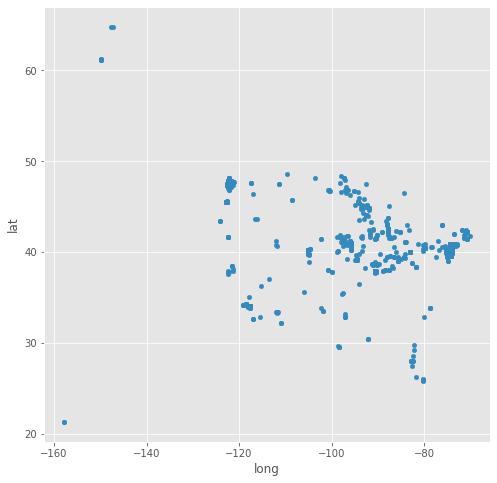

In [467]:
# Look at locations of the homes in the data
fig, ax = plt.subplots( figsize = (8,8) )
df.plot.scatter(x = 'long', y = 'lat', ax = ax)

Below, I use the addresses to find the state and zip code of each record.<br>

Again, the data is actually all from Washington state, but there are errors in finding latitude, longitude, and state for about 3% of the data.

In [468]:
def find_state(x):
    """
    This function takes the addresses in the data and finds the state.
    This is made straightforward because the last word of the state is
    always in position -4 after splitting the data.
    """
    last_word = x.split()[-4]
    word = x.split()[-4]
    if last_word == 'Jersey': word = 'New Jersey'
    if last_word == 'York': word = 'New York'
    if last_word == 'Island': word = 'Rhode Island'
    if last_word == 'Mexico': word = 'New Mexico'
    if last_word == 'Dakota':
        first_word = x.split()[-5]
        word = first_word+' '+last_word
    if last_word == 'Carolina':
        first_word = x.split()[-5]
        word = first_word+' '+last_word
    if last_word == 'Virginia':
        first_word = x.split()[-5]
        if first_word == 'West':
            word = 'West Virginia'
        else:
            word = 'Virginia'
    return word

def find_zip(x):
    """
    This function finds the zip code from the addresses in the data.
    """
    zip_code = x.split()[-3][:-1]
    return int(zip_code)

df['state'] = df['address'].apply(find_state)
df['zip'] = df['address'].apply(find_zip)

In [358]:
df['state'].value_counts()

Washington        29245
Nebraska            159
New Jersey           79
California           77
New York             66
Minnesota            64
Missouri             61
Wisconsin            51
Illinois             36
Pennsylvania         34
Indiana              30
Massachusetts        30
Oregon               29
Colorado             28
Ohio                 27
North Dakota         21
Iowa                 18
Florida              18
Texas                12
Kansas               11
Arizona               8
Michigan              8
Alaska                7
West Virginia         6
South Carolina        5
Montana               5
Utah                  4
Louisiana             3
Rhode Island          3
Oklahoma              2
Idaho                 2
Hawaii                2
Maryland              1
New Mexico            1
Arkansas              1
Nevada                1
Name: state, dtype: int64

In [359]:
df[df['state']=='Washington']['zip'].value_counts()[0:10]

98042    992
98038    858
98103    761
98115    761
98117    748
98023    695
98034    691
98058    683
98133    664
98001    623
Name: zip, dtype: int64

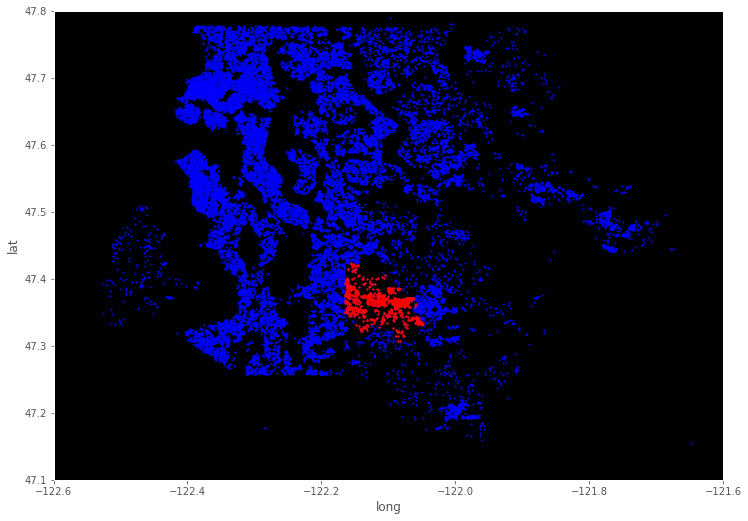

In [470]:
fig, ax = plt.subplots(figsize = (12,9))
df.plot.scatter(x = 'long', y = 'lat', ax = ax, color = (0.0,0.0,1.0,1.0), s = 2)
df[df['zip'] == 98042].plot.scatter(x = 'long', y = 'lat', ax = ax, color = (1.0,0.0,0.0,1.0), s = 3)
ax.set_xbound([-122.6,-121.6])
ax.set_ybound([47.1,47.8])
ax.set_facecolor((0.0, 0.0, 0.0))
plt.gca().set_aspect('equal')
plt.grid(False)

Below, I assign each zip code to a unique integer ID. All of the records with incorrect geographic information will be assigned a single ID. By plotting the points on the map, I found that any zip code with fewer than 20 records is an incorrect zip code.

It is easiest to have the records with incorrect zip codes assigned to 0. However, leaving them that way means they will be used for the baseline case in my linear regression model and I would prefer not to do that. I fix this by shifting every ID down one, then moving the lowest values to the end. By doing this shift, the new zip code used for the baseline is 98042, the zip code with the largest number of sales.

In [471]:
# Convert each zip code to an integer ID
zip_ids = {}
n = 1
for zip_code, count in zip(df['zip'].value_counts().index,df['zip'].value_counts()):
    if count < 20:
        zip_ids[zip_code] = 0
    else:
        zip_ids[zip_code] = n
        n += 1

df['zip_id'] = df['zip'].replace(zip_ids)
# Shift the zip_id by one
df['zip_id'] = df['zip_id'] - 1
# Put incorrect records at the end
df['zip_id'] = df['zip_id'].apply(lambda x: df['zip_id'].max() + 1 if x == -1 else x)

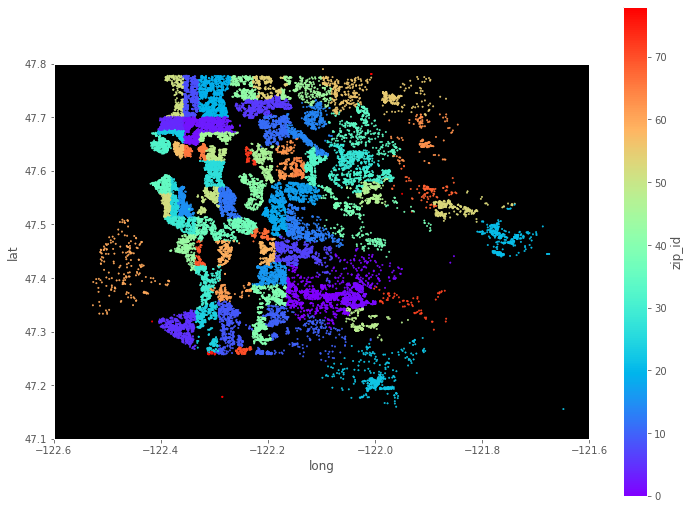

In [472]:
# Look at locations of the homes in the data
# Colored by zip code ID
fig, ax = plt.subplots(figsize = (12,9))
df.plot.scatter(x = 'long', y = 'lat', ax = ax, c = 'zip_id', cmap = 'rainbow', alpha = 1, s = 2)
ax.set_xbound([-122.6,-121.6])
ax.set_ybound([47.1,47.8])
ax.set_facecolor((0.0, 0.0, 0.0))
plt.gca().set_aspect('equal')
plt.grid(False)

Even after excluding all addresses outside of Washington, it seems like some of the data is still located outside King County.
I can identify the specific points and exclude them if I plan on using geographic data.

Text(0, 0.5, 'ZIP ID')

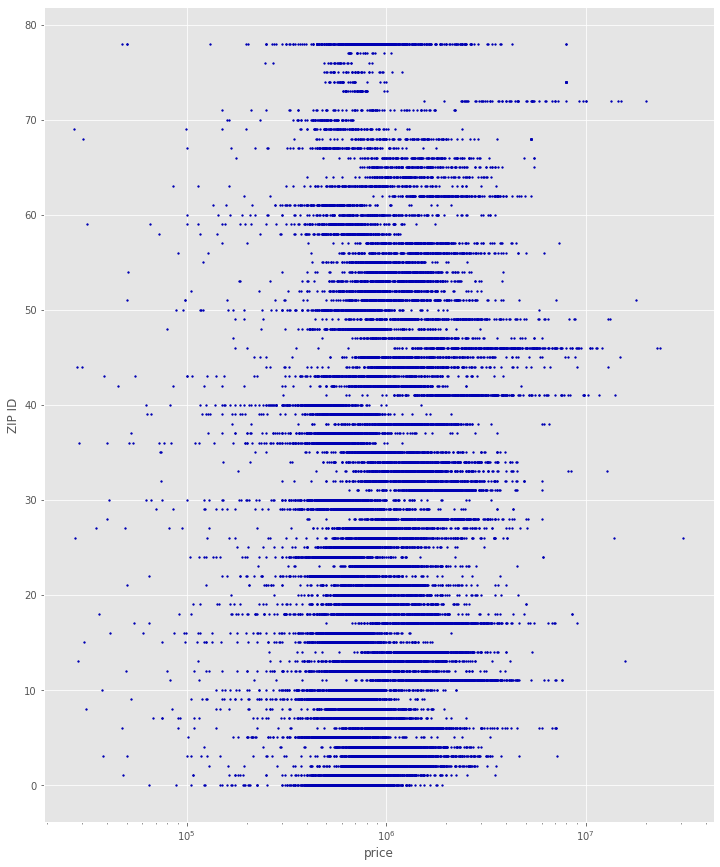

In [475]:
# Plot of price in each zip code
fig, ax = plt.subplots( figsize = (12,15) )

ax.scatter(df['price'],df['zip_id'], s = 3, color = (0.0,0.0,0.7,0.5))
ax.set_xscale('log')
ax.set_xlabel('price')
ax.set_ylabel('ZIP ID')

It does look like some zip codes have significantly different price ranges than other zip codes

Below, I place each feature (other than the target variable, price) into one of three categories:<br>
Continuous numeric, discrete numeric, string categorical

In [476]:
cont_num = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_garage','sqft_patio']

disc_num = ['bedrooms','bathrooms','floors','yr_built','yr_renovated','grade']

str_cat = ['waterfront','greenbelt','nuisance','view','condition','heat_source','sewer_system','zip_id']

I put grade in discrete numerical group. I want the values to actual be numbers. I do that below.

In [477]:
# Change grades from strings to integers
df['grade'] = df['grade'].replace({'1 Cabin': 1,'2 Substandard': 2,'3 Poor': 3, '4 Low': 4, '5 Fair': 5,\
                                   '6 Low Average': 6, '7 Average': 7, '8 Good': 8, '9 Better': 9, '10 Very Good': 10,\
                                   '11 Excellent': 11, '12 Luxury': 12, '13 Mansion': 13})
df['grade'].value_counts()

7     11697
8      9410
9      3806
6      2858
10     1371
11      406
5       393
12      122
4        51
13       24
3        13
2         2
1         2
Name: grade, dtype: int64

In [478]:
# Look at statistical summary of numerical columns
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,zip,zip_id
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,7.651368,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397,96717.101244,27.596783
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,1.148978,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475,9125.385779,20.878151
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480,1541.000000,0.000000
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,7.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045,98030.000000,10.000000
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,8.000000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585,98059.000000,24.000000
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,8.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205,98117.000000,43.000000
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,13.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340,99705.000000,78.000000


For sqft_basement, sqft_garage, and sqft_patio, the minimum values are 0. For records with zeros, that indicates that it doesn't have a basement, garage, or patio. It might make sense to create a categorical variable for whether a home has these features.

In [479]:
df[df['sqft_garage'] > 0].sort_values(by = 'sqft_garage')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,state,zip,zip_id
14977,1549500215,2021-12-17,1803000.0,4,4.0,3,326701,2.0,NO,NO,...,1,0,2021,0,"31072 Northeast 165th Street, Duvall, Washingt...",47.74529,-121.923620,Washington,98019,55
12936,7175300065,2021-07-07,560000.0,3,1.0,1270,6000,1.5,NO,NO,...,40,50,1926,0,"2105 Northeast 73rd Street, Seattle, Washingto...",47.68108,-122.304820,Washington,98115,3
23451,7305300470,2022-05-20,1112200.0,4,3.0,1990,8409,1.0,NO,NO,...,70,240,1948,0,"17053 3rd Avenue Northeast, Shoreline, Washing...",47.75378,-122.327010,Washington,98155,19
22305,1138000090,2021-12-30,885000.0,3,2.0,1180,7201,1.0,NO,NO,...,70,90,1970,0,"12506 98th Avenue Northeast, Kirkland, Washing...",47.71301,-122.210780,Washington,98034,6
13483,8651411470,2022-03-24,499999.0,3,1.0,1170,5330,1.0,NO,NO,...,80,80,1970,0,"19517 Southeast 261st Street, Covington, Washi...",47.36815,-122.079600,Washington,98042,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7468,2746000022,2021-07-20,890000.0,4,3.0,2510,49658,1.0,NO,NO,...,2570,140,1977,0,"20626 229th Avenue Southeast, Maple Valley, Wa...",47.41679,-122.035350,Washington,98038,1
3158,1196001840,2021-12-08,328000.0,4,3.0,2740,23800,1.0,NO,NO,...,2840,310,1969,0,"29308 7th Avenue Southwest, Federal Way, Washi...",47.33937,-122.343630,Washington,98023,5
2984,1824059176,2021-12-17,4700000.0,5,6.0,6620,30056,2.0,NO,NO,...,3050,1730,2006,0,"4656 East Mercer Way, Mercer Island, Washingto...",47.56167,-122.211280,Washington,98040,41
18100,3304700355,2021-12-12,17800000.0,5,7.0,12470,92345,2.0,NO,NO,...,3390,520,1997,0,"69 Olympic Drive, Shoreline, Washington 98177,...",47.74115,-122.374255,Washington,98177,51


There is one record that claims to have the following:<br>

3 square feet of living space<br>

2 square feet of above grade space<br>

1 square foot basement and 1 square foot garage<br>

This could be a mistake and they thought they were listing rooms or someone is being cheeky. Either way, this record is not representative of a real home, so I will remove it.

In [480]:
# Remove the record with unrealistic data
df.drop(index = 14977, inplace = True)
df[df['sqft_garage'] > 0].sort_values(by = 'sqft_garage')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,state,zip,zip_id
12936,7175300065,2021-07-07,560000.0,3,1.0,1270,6000,1.5,NO,NO,...,40,50,1926,0,"2105 Northeast 73rd Street, Seattle, Washingto...",47.68108,-122.304820,Washington,98115,3
23451,7305300470,2022-05-20,1112200.0,4,3.0,1990,8409,1.0,NO,NO,...,70,240,1948,0,"17053 3rd Avenue Northeast, Shoreline, Washing...",47.75378,-122.327010,Washington,98155,19
22305,1138000090,2021-12-30,885000.0,3,2.0,1180,7201,1.0,NO,NO,...,70,90,1970,0,"12506 98th Avenue Northeast, Kirkland, Washing...",47.71301,-122.210780,Washington,98034,6
7641,3797001995,2021-09-08,995000.0,3,2.5,2210,3000,2.0,NO,NO,...,80,220,1929,0,"902 North 76th Street, Seattle, Washington 981...",47.68418,-122.346960,Washington,98103,2
16746,5379802853,2021-09-02,525000.0,3,2.0,1480,16875,1.0,NO,NO,...,80,0,1964,0,"16425 48th Avenue South, SeaTac, Washington 98...",47.45551,-122.273530,Washington,98188,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7468,2746000022,2021-07-20,890000.0,4,3.0,2510,49658,1.0,NO,NO,...,2570,140,1977,0,"20626 229th Avenue Southeast, Maple Valley, Wa...",47.41679,-122.035350,Washington,98038,1
3158,1196001840,2021-12-08,328000.0,4,3.0,2740,23800,1.0,NO,NO,...,2840,310,1969,0,"29308 7th Avenue Southwest, Federal Way, Washi...",47.33937,-122.343630,Washington,98023,5
2984,1824059176,2021-12-17,4700000.0,5,6.0,6620,30056,2.0,NO,NO,...,3050,1730,2006,0,"4656 East Mercer Way, Mercer Island, Washingto...",47.56167,-122.211280,Washington,98040,41
18100,3304700355,2021-12-12,17800000.0,5,7.0,12470,92345,2.0,NO,NO,...,3390,520,1997,0,"69 Olympic Drive, Shoreline, Washington 98177,...",47.74115,-122.374255,Washington,98177,51


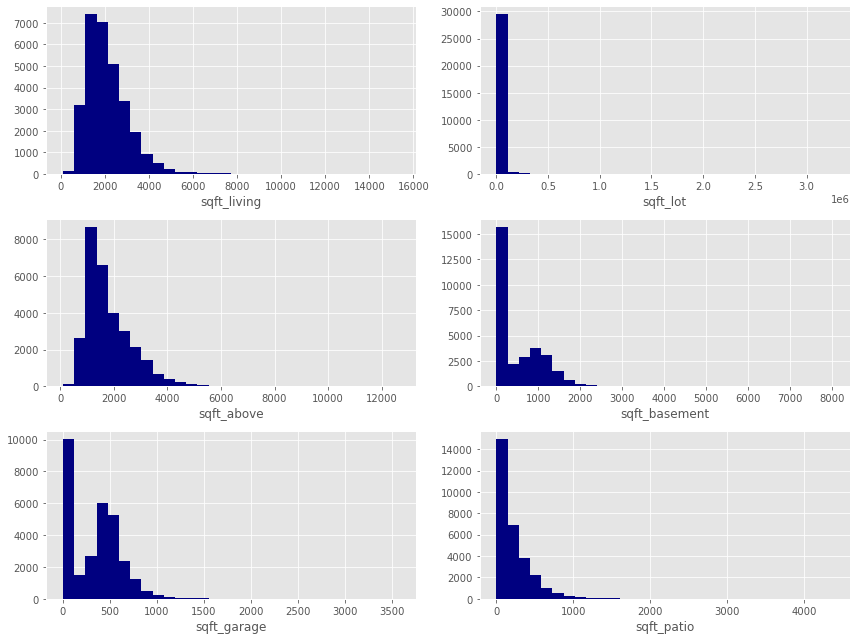

In [483]:
# Histograms of the continuous numerical data
fig, ax = plt.subplots(ncols = 2, nrows = 3, figsize = (12,9) )
for n, feat in enumerate(cont_num):
    i = n // 2
    j = n % 2
    ax[i,j].hist(df[feat], bins = 30, color = (0.0,0.0,0.5,1.0))
    ax[i,j].set_xlabel(feat)
fig.tight_layout()

Most of the continuous numeric features have highly skewed distributions. It might make sense to take a log of these (including the target variable, price)

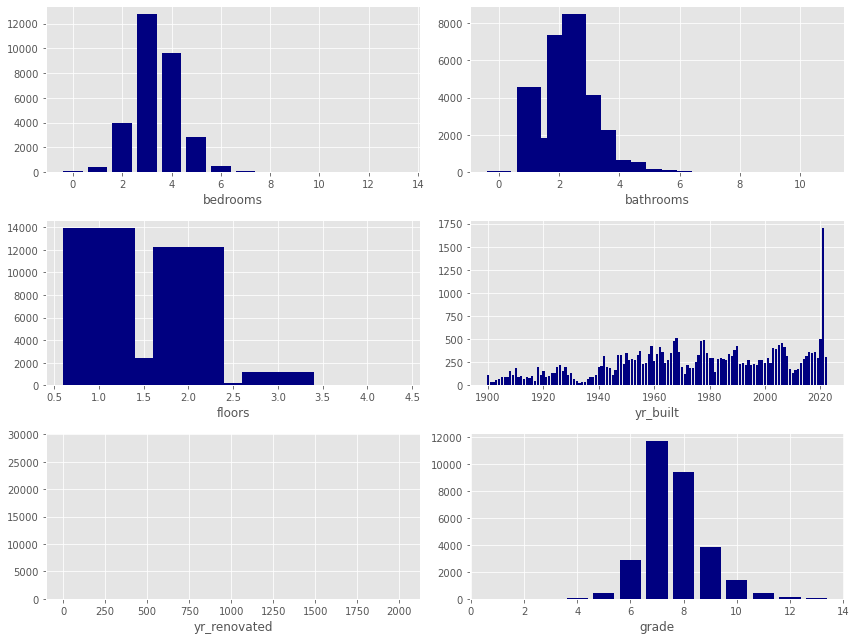

In [484]:
# Histograms of the discrete numerical data
fig, ax = plt.subplots(ncols = 2, nrows = 3, figsize = (12,9) )
for n, feat in enumerate(disc_num):
    i = n // 2
    j = n % 2
    x = df[feat].value_counts().index
    y = df[feat].value_counts()
    ax[i,j].bar(x,y, color = (0.0,0.0,0.5,1.0))
    ax[i,j].set_xlabel(feat)
fig.tight_layout()

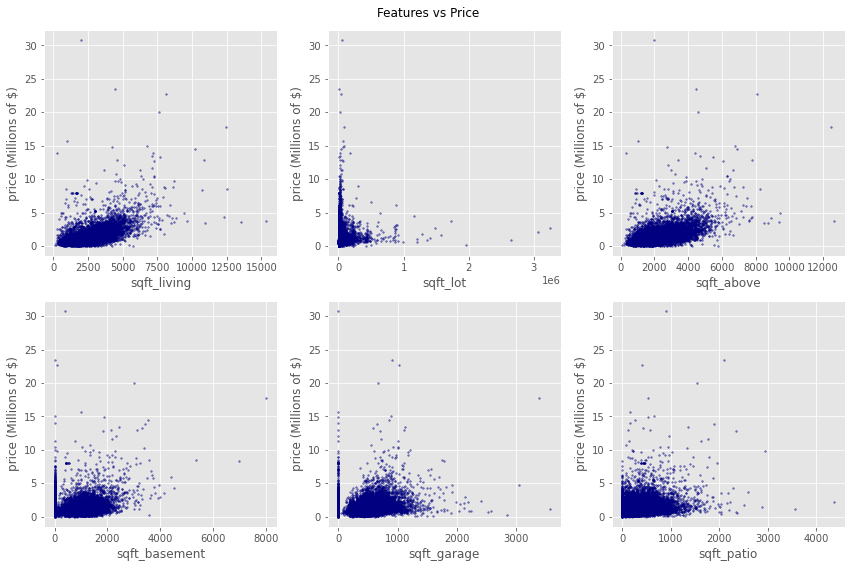

In [485]:
# Plots of continuous numeric features vs. price
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize = (12,8))

for n, feat in enumerate(cont_num):
    i = n // 3
    j = n % 3
    df_good = df[df[feat].isna() == False]
    ax[i,j].scatter(df_good[feat],df_good['price']/1000000, alpha=0.5, s=3, color = (0.0,0.0,0.5,0.5))
    ax[i,j].set_xlabel(feat)
    ax[i,j].set_ylabel('price (Millions of $)')
fig.suptitle('Features vs Price')
fig.tight_layout()

These plots really reinforce the need to take logs of some of these variables. For most of the scatterplots above, the data is concentrated in the bottom left corner.
The same plots, but with logs taken, are below.

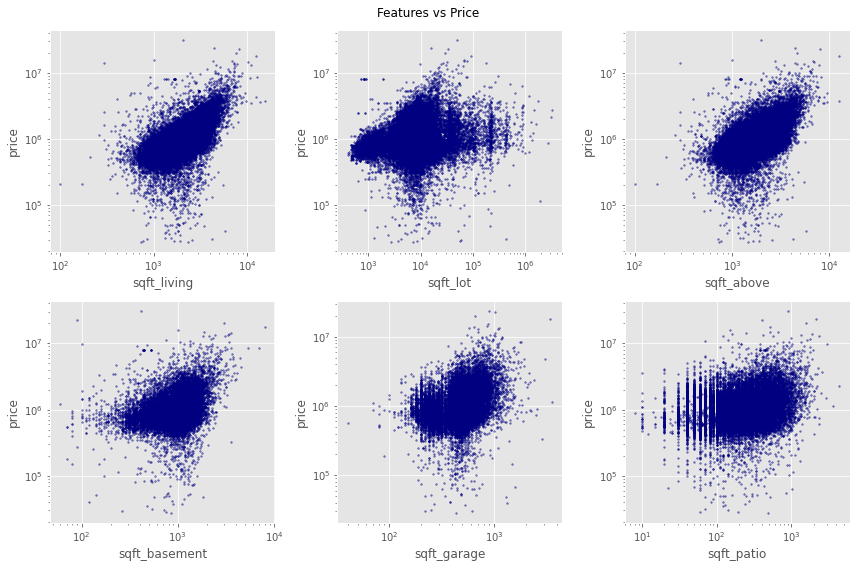

In [486]:
# Same as above, but now log-log plots
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize = (12,8))

for n, feat in enumerate(cont_num):
    i = n // 3
    j = n % 3
    df_good = df[(df[feat].isna() == False) & (df[feat] != 0)]
    ax[i,j].scatter(df_good[feat],df_good['price'], alpha=0.5, s = 3, color = (0.0,0.0,0.5,0.5))
    ax[i,j].set_yscale('log')
    ax[i,j].set_xscale('log')
    ax[i,j].set_xlabel(feat)
    ax[i,j].set_ylabel('price')
fig.suptitle('Features vs Price')
fig.tight_layout()

Notes about plots above:<br>
It seems appropriate to take logs of most of these variables since their distributions are pretty skewed before taking logs. After taking logs, the scatterplots have a much more normal distributions and linear trends are easier to see.<br>
It is not appropriate to take logs of latitude and longitude. This is fine because that is not how I plan to use those anyway. <br>

Visible trends:<br>
sqft_living and sqft_above both show a positive trend with price.<br>
sqft_basement, sqft_garage, and sqft_patio show weaker positive trends with price.<br>

For some of these features, there are zeros that effectively become negative infinity after taking a log. A way around this is to create categorical variables that indicate whether the feature is 0 or not. For example, sqft_garage is 0 if a home does not have a garage. I would create a categorical variable called has_garage which would either be 0 or 1. In the model, I would use has_garage x ln(garage) instead of just using ln(garage). I think it would also make sense to use has_garage by itself in addition to this interaction term.<br>

I also like the idea of shifting each so the median is at 0. This will make the constant easier to interpet.

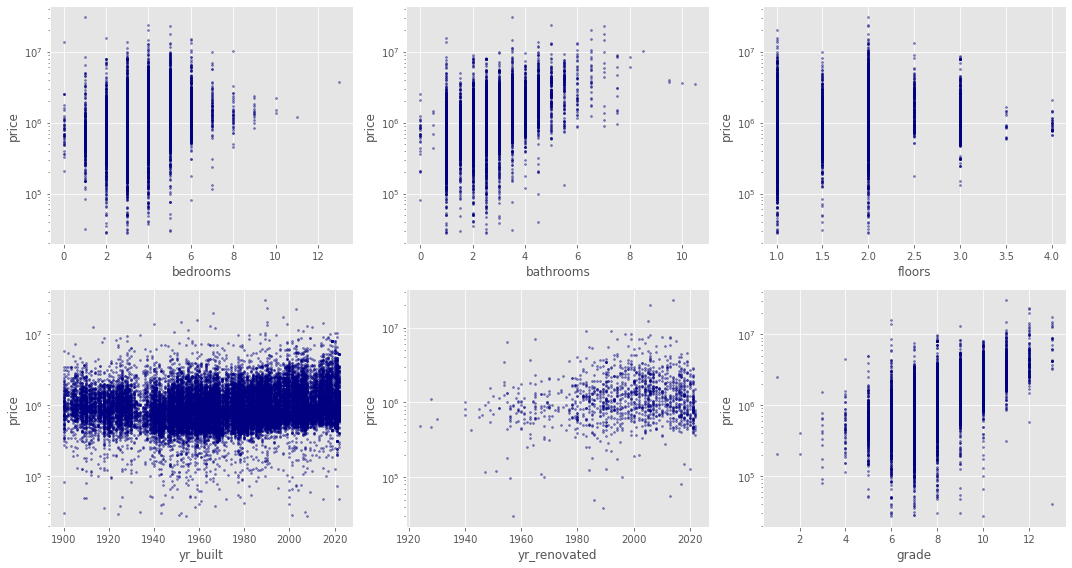

In [487]:
# Plots of discrete numeric features with price on log scale
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize = (15,8))

for n, feat in enumerate(disc_num):
    i = n // 3
    j = n % 3
    if feat == 'yr_renovated':
        df_good = df[(df[feat].isna() == False) & (df[feat] != 0)]
    else:
        df_good = df[df[feat].isna() == False]
    ax[i,j].scatter(df_good[feat],df_good['price'], alpha=0.5, s=4, color = (0.0,0.0,0.5,0.5))
    ax[i,j].set_yscale('log')
    ax[i,j].set_xlabel(feat)
    ax[i,j].set_ylabel('price')
fig.tight_layout()

In [550]:
df_adj[df_adj['yr_renovated'] != 0]['ln_price'].mean()

0.27232507561662483

The discrete numeric features are fine as is. It would not make much sense to take logs of these.<br>

Visible trends:<br>
The strongest trend is grade vs. price. Higher grades tend to go with higher prices.<br>
It also looks like more bathrooms tends to lead to higher prices.<br>
There might be a slight upward trend in price for more recently built houses.

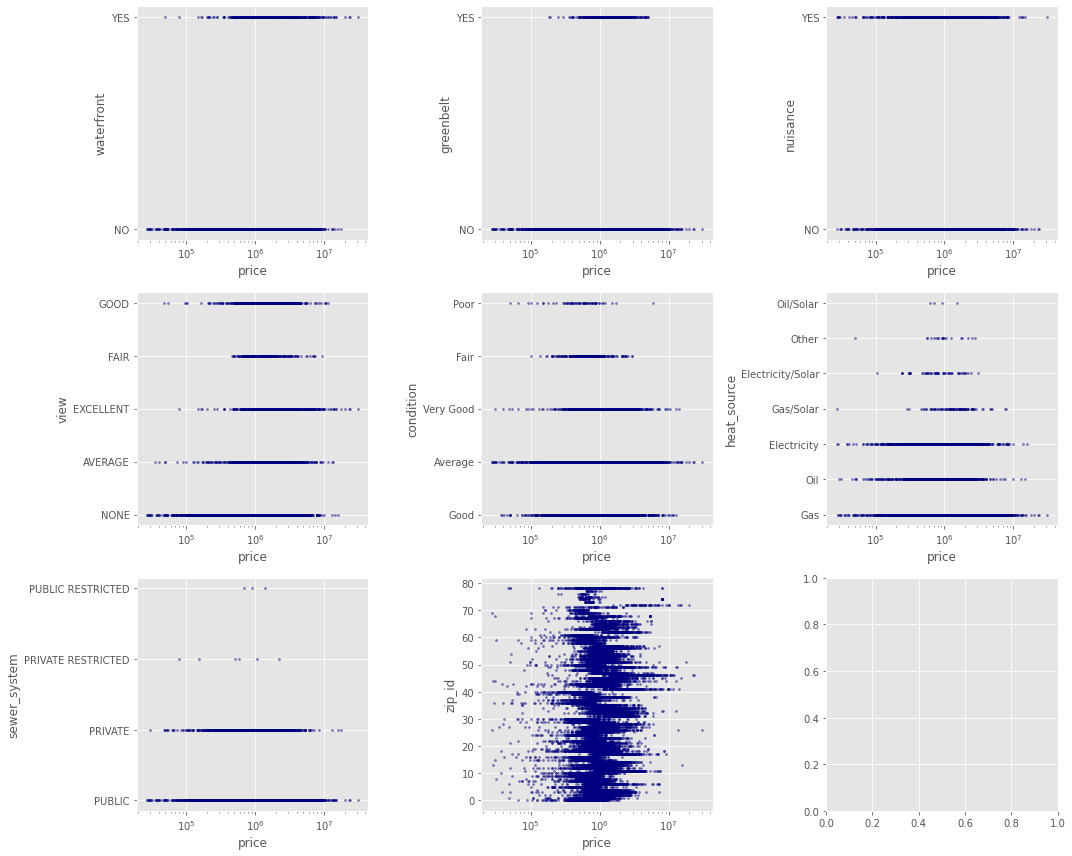

In [488]:
# Scatterplots of categorical features vs price in log scale
fig, ax = plt.subplots(ncols = 3, nrows = 3, figsize = (15,12))

for n, feat in enumerate(str_cat):
    i = n // 3
    j = n % 3
    df_good = df[df[feat].isna() == False]
    ax[i,j].scatter(df_good['price'], df_good[feat], s=4, color = (0.0,0.0,0.5,0.5))
    ax[i,j].set_xscale('log')
    ax[i,j].set_ylabel(feat)
    ax[i,j].set_xlabel('price')
fig.tight_layout()

Visible trends:<br>

It appears that having waterfront property tends to correlate with higher prices.<br>
There may be a trend with price vs. view, but it is not as obvious.

In the cell below, I make some adjustments to the data to make it better for performing linear regression.

1. Create categories to indicate whether the house has a basement, garage, or patio

2. Take ln of continuous numerical data (except lat and long) then shift so the median is at 0. This is the same as dividing all the data by the median, THEN taking the ln.

3. Shift the discrete numerical data so it has the median at zero.

In [557]:
make_category = ['basement','garage','patio']
to_ln = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_garage','sqft_patio']
to_shift = ['bedrooms','bathrooms','floors','yr_built','grade']

df_adj = df.copy()

for feat in make_category:
    df_adj['has_'+feat] = df['sqft_'+feat].apply(lambda x: 0 if x == 0 else 1)

for feat in to_ln:
    # If 0, set ln(feature) to -10
    df_adj['ln_'+feat] = df[feat].apply(lambda x: -10 if x == 0 else np.log(x))
    feat_median = np.median(df_adj[df_adj['ln_'+feat] != -10]['ln_'+feat])
    print(f"Median of ln_{feat} is {feat_median}")
    df_adj['ln_'+feat] = df_adj['ln_'+feat].apply(lambda x: -10 if x == -10 else x - feat_median)
    df_adj.drop(columns = [feat], inplace=True)

for feat in to_shift:
    df_adj[feat] = df[feat] - np.median(df[feat])
    print(f"Median of {feat} is {np.median(df[feat])}")
    
#yr_renovated needs to be shifted, but with zeros ignored
df_adj['has_yr_renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
feat_median = np.median(df[df['yr_renovated'] != 0]['yr_renovated'])
df_adj['yr_renovated'] = df['yr_renovated'].apply(lambda x: -100 if x == 0 else x - feat_median)
print(f"Median of yr_renovated is {np.median(df[df['yr_renovated'] != 0]['yr_renovated'])}")

df_adj

Median of ln_price is 13.664687668229691
Median of ln_sqft_living is 7.560080465021827
Median of ln_sqft_lot is 8.919988070968524
Median of ln_sqft_above is 7.352441100243583
Median of ln_sqft_basement is 6.866933284461882
Median of ln_sqft_garage is 6.152732694704104
Median of ln_sqft_patio is 5.393627546352362
Median of bedrooms is 3.0
Median of bathrooms is 2.5
Median of floors is 1.5
Median of yr_built is 1977.0
Median of grade is 8.0
Median of yr_renovated is 2002.0


,id,date,bedrooms,bathrooms,floors,waterfront,greenbelt,nuisance,view,condition,...,has_garage,has_patio,ln_price,ln_sqft_living,ln_sqft_lot,ln_sqft_above,ln_sqft_basement,ln_sqft_garage,ln_sqft_patio,has_yr_renovated
0,7399300360,2022-05-24,1.0,-1.5,-0.5,NO,NO,NO,NONE,Good,...,0,1,-0.242220,-0.486811,-0.046520,-0.279171,-10.000000,-10.000000,-1.704748,0
1,8910500230,2021-12-13,2.0,0.0,-0.5,NO,NO,YES,AVERAGE,Average,...,0,1,0.067441,0.366522,-0.109678,0.006390,0.491898,-10.000000,0.087011,0
2,1180000275,2021-09-29,3.0,-0.5,-0.5,NO,NO,NO,AVERAGE,Average,...,0,0,-1.017139,0.405465,-0.194806,0.012739,0.498247,-10.000000,-10.000000,0
3,1604601802,2021-12-14,0.0,0.5,0.5,NO,NO,NO,AVERAGE,Average,...,1,1,-0.104069,0.117783,-1.675761,-0.358508,0.108481,-0.854415,0.204794,0
4,8562780790,2021-08-24,-1.0,-0.5,0.5,NO,NO,YES,NONE,Average,...,1,1,-0.372582,-0.538997,-2.289305,-0.331357,-0.557015,0.157186,-1.992430,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,2021-11-30,2.0,-0.5,0.0,NO,NO,NO,NONE,Good,...,0,1,0.592298,-0.005222,-0.625938,0.025318,0.163040,-10.000000,-0.046520,0
30151,194000695,2021-06-16,0.0,-0.5,0.5,NO,NO,NO,FAIR,Average,...,0,1,0.423137,0.050772,-0.254375,0.258412,-10.000000,-10.000000,0.860201,0
30152,7960100080,2022-05-27,0.0,-0.5,-0.5,NO,NO,YES,NONE,Average,...,1,1,-0.072321,-0.169899,-0.731299,-0.506561,-0.042560,-0.672094,-0.693147,0
30153,2781280080,2022-02-24,0.0,0.0,0.5,NO,NO,NO,NONE,Average,...,1,1,-0.104069,0.291581,-0.951322,0.159630,-0.260283,0.021053,-0.788457,0


In [553]:
# Correlation coefficients
df_adj.corr()

,id,bedrooms,bathrooms,floors,grade,yr_built,yr_renovated,lat,long,zip,...,has_garage,has_patio,ln_price,ln_sqft_living,ln_sqft_lot,ln_sqft_above,ln_sqft_basement,ln_sqft_garage,ln_sqft_patio,has_yr_renovated
id,1.000000,-0.006285,-0.012030,0.032072,0.003019,0.023122,0.005849,-0.000681,0.000475,0.002695,...,0.031093,0.003224,-0.024237,-0.015385,-0.157954,-0.013113,0.004751,0.028094,-0.005131,-0.029142
bedrooms,-0.006285,1.000000,0.589274,0.147578,0.374752,0.146169,0.023079,0.108753,-0.106687,0.104215,...,0.241979,0.165748,0.346255,0.684955,0.195537,0.587340,0.093855,0.257545,0.183992,0.014049
bathrooms,-0.012030,0.589274,1.000000,0.404390,0.647764,0.443600,0.037970,-0.005243,0.017407,-0.013392,...,0.339200,0.285070,0.516769,0.766764,0.091204,0.668435,0.142104,0.359973,0.316058,0.040220
floors,0.032072,0.147578,0.404390,1.000000,0.464756,0.544632,0.001208,-0.218564,0.233786,-0.220452,...,0.099445,0.204494,0.234005,0.314291,-0.346543,0.461481,-0.186766,0.104663,0.206081,-0.025410
grade,0.003019,0.374752,0.647764,0.464756,1.000000,0.481618,0.037292,-0.043357,0.072640,-0.069312,...,0.339146,0.257774,0.614177,0.705815,0.074560,0.688223,0.039062,0.363211,0.294940,-0.012412
yr_built,0.023122,0.146169,0.443600,0.544632,0.481618,1.000000,0.094980,-0.207207,0.209891,-0.193398,...,0.441992,0.195412,0.120684,0.311248,-0.166571,0.395952,-0.253230,0.453680,0.202137,-0.239745
yr_renovated,0.005849,0.023079,0.037970,0.001208,0.037292,0.094980,1.000000,-0.007684,0.007210,-0.006503,...,0.054021,-0.011503,0.021329,0.009335,-0.021446,-0.004963,-0.006967,0.053843,-0.015002,-0.194182
lat,-0.000681,0.108753,-0.005243,-0.218564,-0.043357,-0.207207,-0.007684,1.000000,-0.760767,0.703533,...,0.065015,-0.028377,0.074273,0.108707,0.254051,0.105807,-0.022563,0.070676,-0.032603,0.036964
long,0.000475,-0.106687,0.017407,0.233786,0.072640,0.209891,0.007210,-0.760767,1.000000,-0.976938,...,-0.075714,0.029952,-0.018704,-0.095293,-0.267919,-0.099330,0.043533,-0.080880,0.035796,-0.035636
zip,0.002695,0.104215,-0.013392,-0.220452,-0.069312,-0.193398,-0.006503,0.703533,-0.976938,1.000000,...,0.076829,-0.027931,0.016809,0.094124,0.261054,0.100905,-0.049155,0.082110,-0.033985,0.032914


In [554]:
# Correlation between living space and basement space
np.corrcoef(df_adj[df_adj['has_basement'] == 1]['ln_sqft_living'],df_adj[df_adj['has_basement'] == 1]['ln_sqft_basement'])

array([[1.        , 0.61799147],
       [0.61799147, 1.        ]])

The DataFrame of correlation coefficients underestimates some of the coefficients, particular for the ln_sqft_basement, ln_sqft_garage, and ln_sqft_patio features because it is counting the values even when it doesn't have that feature. If I remove those, like I have above, the correlation coefficient goes up significantly. This means that it might not make sense to include parameters for living area and basement/garage/patio area because they are fairly colinear.

Text(0.5, 1.0, 'Correlation Between Numeric Data')

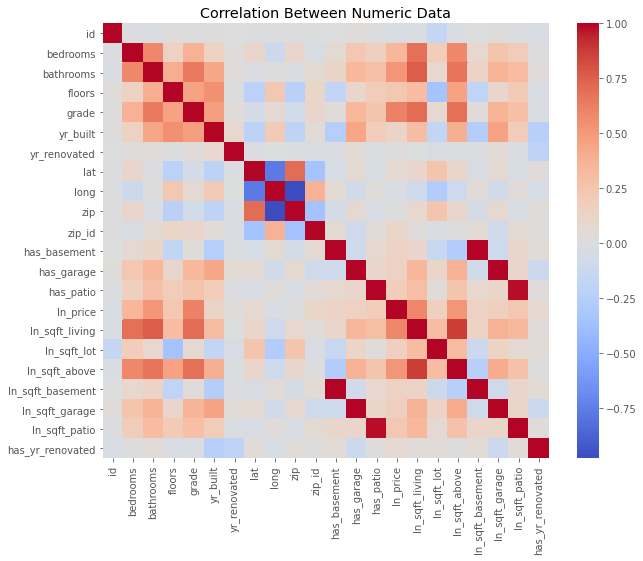

In [555]:
fig, ax = plt.subplots ( figsize = (10,8))
sns.heatmap(df_adj.corr(), ax = ax, cmap = 'coolwarm')
ax.set_title('Correlation Between Numeric Data')

In [493]:
# Find the largest correlation coefficients
df_corr = df_adj.corr().stack().reset_index().sort_values(0, ascending=False)
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
df_corr.drop(columns = ['level_0','level_1'], inplace=True)
df_corr.set_index(['pairs'], inplace=True)
df_corr.rename(columns = {0:'corr'}, inplace=True)
df_corr

,corr
pairs,
"(id, id)",1.000000
"(has_basement, has_basement)",1.000000
"(floors, floors)",1.000000
"(grade, grade)",1.000000
"(yr_built, yr_built)",1.000000
...,...
"(zip_id, zip)",-0.357411
"(long, lat)",-0.760767
"(lat, long)",-0.760767


In [494]:
df_corr[(df_corr['corr'] > 0.75) | (df_corr['corr'] < -0.75)]

,corr
pairs,
"(id, id)",1.000000
"(has_basement, has_basement)",1.000000
"(floors, floors)",1.000000
"(grade, grade)",1.000000
"(yr_built, yr_built)",1.000000
"(yr_renovated, yr_renovated)",1.000000
"(lat, lat)",1.000000
"(long, long)",1.000000
"(zip, zip)",1.000000


Strong correlations:<br>

sqft_living and sqft_above: 0.874414<br>

It would not make sense to include both sqft_living and sqft_above in the model since they are highly correlated and basically represent the same information.

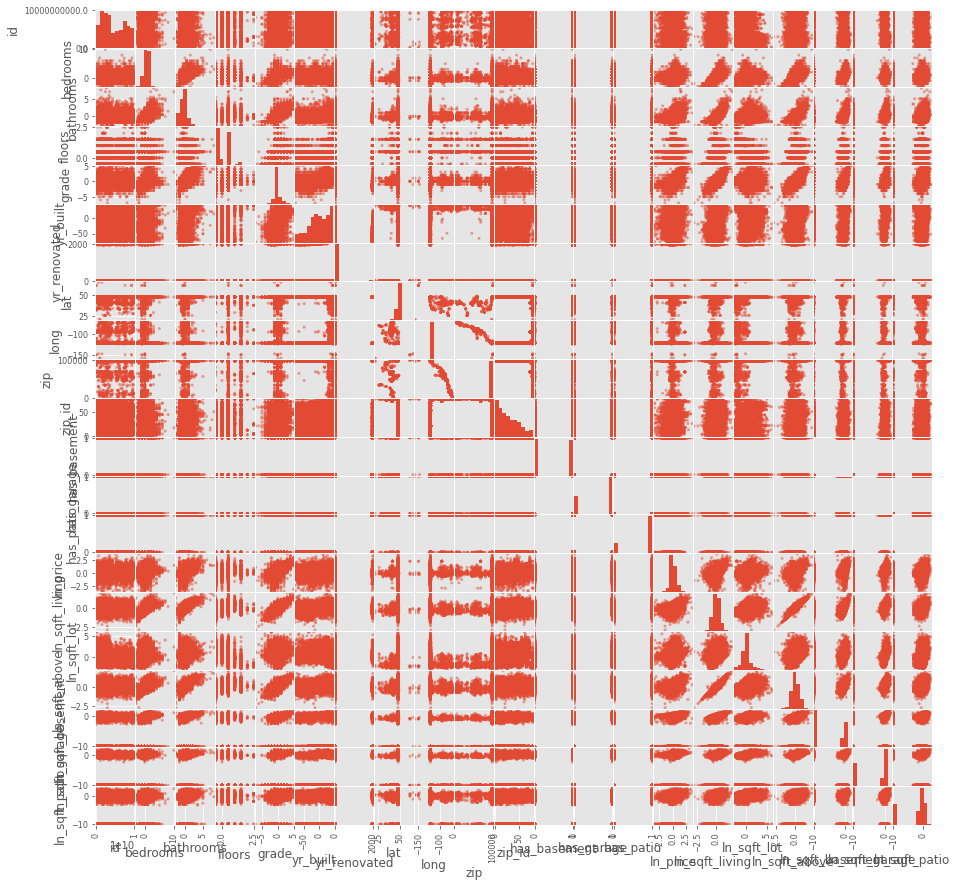

In [495]:
# Scatter matrix again, but this time with logs of continuous numeric values
pd.plotting.scatter_matrix(df_adj, figsize = (15,15));

## Iteratively making a model

In [576]:
# Choose features to include
# 1 is included, 0 is excluded

features = [['ln_sqft_living','numerical',1], \
            ['ln_sqft_lot','numerical',0], \
            ['ln_sqft_basement','num-cat',0], \
            ['ln_sqft_garage','num-cat',0], \
            ['ln_sqft_patio','num-cat',0], \
            ['bedrooms','numerical',0], \
            ['bathrooms','numerical',0], \
            ['floors','numerical',0], \
            ['yr_built','numerical',0], \
            ['condition','categorical',1], \
            ['grade','numerical',1], \
            ['waterfront','YN',1], \
            ['greenbelt','YN',0], \
            ['nuisance','YN',0], \
            ['view','categorical',0], \
            ['zip_id','categorical',1], \
            ['yr_renovated','num-cat2',1]]

y = df_adj['ln_price']

in_fit = df_adj[['ln_price']]
for feat in features:
    if feat[2] == 1:
            
        if feat[1] == 'numerical': in_fit[feat[0]] = df_adj[feat[0]]
                
        if feat[1] == 'num-cat':
            in_fit['has_'+feat[0]] = df_adj[feat[0]].apply(lambda x: 0 if x == -10 else 1)
            in_fit[feat[0]] = df_adj[feat[0]] * in_fit['has_'+feat[0]]
            
        if feat[1] == 'num-cat2':
            in_fit['has_'+feat[0]] = df_adj[feat[0]].apply(lambda x: 0 if x == -100 else 1)
            #in_fit[feat[0]] = df_adj[feat[0]] * in_fit['has_'+feat[0]]
                
        if feat[1] == 'categorical':
            in_fit[feat[0]] = df_adj[feat[0]]
            in_fit = pd.get_dummies(in_fit, columns=[feat[0]], drop_first=True)
                
        if feat[1] == 'YN': in_fit['has_'+feat[0]] = df_adj[feat[0]].apply(lambda x: 1 if x == 'YES' else 0)

X = in_fit.drop(columns = 'ln_price')
results = sm.OLS(y,sm.add_constant(X)).fit()
results.summary()

<ipython-input-576-6d6fda21f6da>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if feat[1] == 'numerical': in_fit[feat[0]] = df_adj[feat[0]]
<ipython-input-576-6d6fda21f6da>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_fit[feat[0]] = df_adj[feat[0]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     738.1
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:42:37   Log-Likelihood:                -9397.4
No. Observations:               30154   AIC:                         1.897e+04
Df Residuals:                   30067   BIC:                         1.969e+04
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3016      0.011    -28.158      0.000      -0.323      -0.281
ln_sqft_living          0.4429      0.007     67.705      0.000       0.430       0.456
condition_Fair         -0.0533      0.022     -2.404      0.016      -0.097      -0.010
condition_Good          0.0660      0.005     14.229      0.000       0.057       0.075
condition_Poor         -0.0937      0.041     -2.264      0.024      -0.175      -0.013
condition_Very Good     0.1262      0.007     19.409      0.000       0.113       0.139
grade                   0.1179      0.003     44.772      0.000       0.113       0.123
has_waterfront          0.4641      0.015     30.801      0.000       0.435       0.494
zip_id_1                0.1445      0.015      9.362      0.000       0.114       0.175
zip_id_2                0.5789      0.016     36.090      0.000       0.547       0.610
zip_id_3                0.5921      0.016     37.041      0.000       0.561       0.623
zip_id_4                0.5826      0.016     36.243      0.000       0.551       0.614
zip_id_5               -0.0868      0.016     -5.297      0.000      -0.119      -0.055
zip_id_6                0.6063      0.016     36.967      0.000       0.574       0.638
zip_id_7                0.0919      0.016      5.583      0.000       0.060       0.124
zip_id_8                0.3285      0.017     19.729      0.000       0.296       0.361
zip_id_9               -0.0434      0.017     -2.566      0.010      -0.077      -0.010
zip_id_10              -0.0318      0.017     -1.864      0.062      -0.065       0.002
zip_id_11               0.9074      0.017     53.046      0.000       0.874       0.941
zip_id_12               0.3268      0.017     19.047      0.000       0.293       0.360
zip_id_13               0.3161      0.017     18.294      0.000       0.282       0.350
zip_id_14               0.7157      0.017     40.991      0.000       0.682       0.750
zip_id_15               0.1967      0.018     11.079      0.000       0.162       0.231
zip_id_16              -0.0178      0.018     -1.001      0.317      -0.053       0.017
zip_id_17               0.6961      0.018     38.646      0.000       0.661       0.731
zip_id_18               0.2935      0.018     16.364      0.000       0.258       0.329
zip_id_19               0.4034      0.018     22.417      0.000       0.368       0.439
zip_id_20               0.4327      0.018     23.620      0.000       0.397       0.469
zip_id_21               0.3169      0.019     17.067      0.000       0.280       0.353
zip_id_22               0.0104      0.019      0.557      0.577      -0.026       0.047
zip_id_23               0.5879      0.019     31.291      0.000       0.551       0.625
zip_id_24              -0.0824      0.019     -4.349      0.000      -0.120      -0.045
zip

In [497]:
# Convert the covariance matrix to a correlation matrix
corr_params = results.cov_params().copy()
for param in corr_params.index:
    corr_params[param] = corr_params[param] / np.sqrt(results.cov_params()[param][param])
    corr_params[corr_params.index == param] = corr_params[corr_params.index == param] /\
                                                np.sqrt(results.cov_params()[param][param])
corr_params

,const,ln_sqft_living,grade,has_waterfront,zip_id_1,zip_id_2,zip_id_3,zip_id_4,zip_id_5,zip_id_6,...,zip_id_69,zip_id_70,zip_id_71,zip_id_72,zip_id_73,zip_id_74,zip_id_75,zip_id_76,zip_id_77,zip_id_78
const,1.000000,-0.102287,0.132795,-0.012215,-0.673760,-0.658772,-0.656136,-0.653700,-0.638694,-0.635098,...,-0.289791,-0.264840,-0.248010,-0.239791,-0.205732,-0.200336,-0.201015,-0.149232,-0.145961,-0.680275
ln_sqft_living,-0.102287,1.000000,-0.677484,-0.007433,-0.012766,0.095895,0.049306,0.068382,0.024415,0.002846,...,0.002437,0.006574,-0.012234,0.000638,0.073349,0.066501,0.070802,0.006290,0.056897,0.183751
grade,0.132795,-0.677484,1.000000,-0.020732,0.002829,-0.056866,-0.024755,-0.033920,-0.021855,-0.001009,...,0.014994,0.022966,0.007301,-0.052024,-0.061144,-0.055518,-0.061052,0.000768,-0.047539,-0.173946
has_waterfront,-0.012215,-0.007433,-0.020732,1.000000,-0.022148,0.005486,0.003368,0.005468,-0.017131,-0.004187,...,0.002143,0.001354,-0.008020,-0.035052,0.001995,0.001953,0.002045,0.001225,0.001415,-0.000317
zip_id_1,-0.673760,-0.012766,0.002829,-0.022148,1.000000,0.444975,0.447142,0.444076,0.436879,0.436251,...,0.199955,0.183231,0.171565,0.162177,0.134385,0.131317,0.131244,0.102305,0.094879,0.448662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zip_id_74,-0.200336,0.066501,-0.055518,0.001953,0.131317,0.133482,0.130803,0.131226,0.126180,0.124497,...,0.056919,0.052265,0.047992,0.046796,0.043652,1.000000,0.042604,0.029532,0.031193,0.141566
zip_id_75,-0.201015,0.070802,-0.061052,0.002045,0.131244,0.133811,0.130928,0.131415,0.126267,0.124460,...,0.056828,0.052142,0.047926,0.047033,0.044009,0.042604,1.000000,0.029525,0.031471,0.142551
zip_id_76,-0.149232,0.006290,0.000768,0.001225,0.102305,0.099401,0.099446,0.099001,0.096648,0.096470,...,0.044448,0.040912,0.037759,0.035019,0.030262,0.029532,0.029525,1.000000,0.021402,0.100293
zip_id_77,-0.145961,0.056897,-0.047539,0.001415,0.094879,0.097364,0.095015,0.095479,0.091489,0.090066,...,0.041144,0.037786,0.034605,0.033987,0.032247,0.031193,0.031471,0.021402,1.000000,0.104136


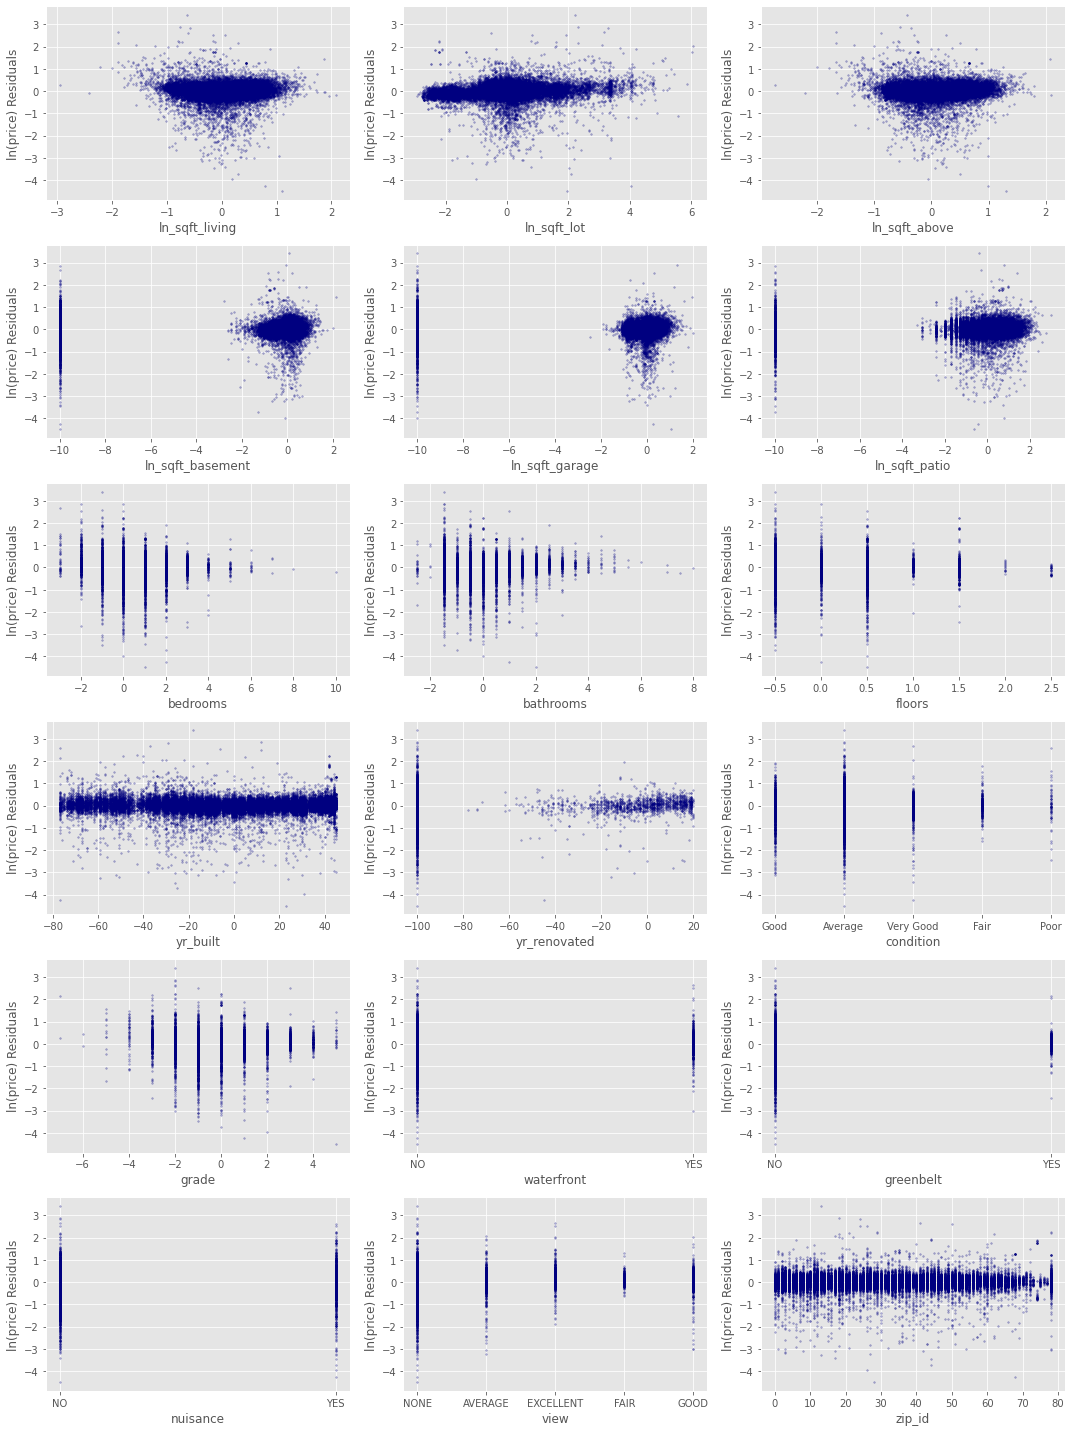

In [577]:
# Plot residuals against each numeric feature
fig, ax = plt.subplots(ncols = 3, nrows = 6, figsize = (15,20))

features = ['ln_sqft_living','ln_sqft_lot','ln_sqft_above','ln_sqft_basement','ln_sqft_garage','ln_sqft_patio',\
            'bedrooms','bathrooms','floors','yr_built','yr_renovated','condition','grade','waterfront','greenbelt',\
            'nuisance','view','zip_id']

for n, feat in enumerate(features):
    i = n // 3
    j = n % 3
    ax[i,j].scatter(df_adj[feat], results.resid, s=3, color = (0.0,0.0,0.5,0.3))
    ax[i,j].set_ylabel('ln(price) Residuals')
    ax[i,j].set_xlabel(feat)
fig.tight_layout()

Text(0, 0.5, 'count')

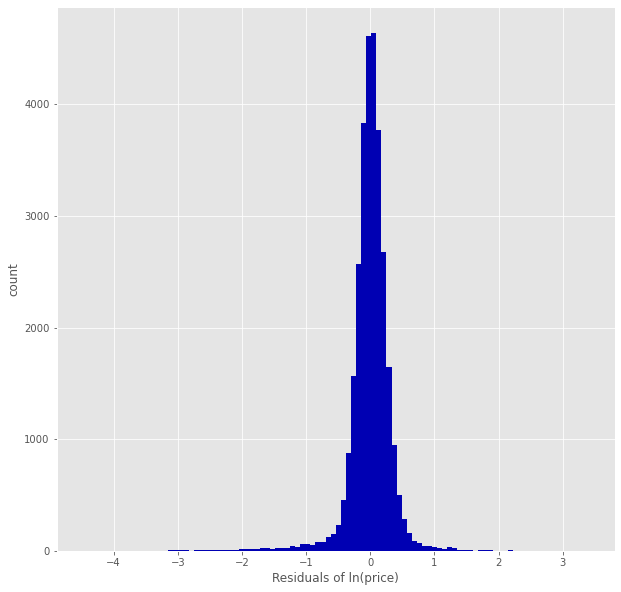

In [570]:
# Plot histogram of residuals
fig, ax = plt.subplots( figsize = (10,10) )

ax.hist(results.resid, bins = 100, color = (0.0,0.0,0.7,1.0))
ax.set_xlabel('Residuals of ln(price)')
ax.set_ylabel('count')

In [571]:
stats.kurtosis(results.resid)

20.225072536267366

The histogram of the residuals are symmetric (no skew), and more centrally peaked than a normal distribution (kurtosis equals 20). This means the distribution is more concentrated near the center and less in the tails.

In [572]:
print(f"Standard Deviation of residuals: {np.std(results.resid, ddof=1)}")
print(f"95% confidence interval of Price Multiplier Not Explained by Model:[{round(np.exp(-2*np.std(results.resid, ddof=1)),3)}-{round(np.exp(2*np.std(results.resid, ddof=1)),3)}]")

Standard Deviation of residuals: 0.3300580566783907
95% confidence interval of Price Multiplier Not Explained by Model:[0.517-1.935]


The cell above shows that the variance not explained by the model still allows for predictions that are off by a factor of 2.
This means the actual price could be half of what is predicted or twice what is predicted.

In [573]:
np.exp(stats.mstats.mquantiles(results.resid, prob=[0.025,0.975]))

array([0.52099128, 1.67552599])

Since the distribution is more centrally concentrated than a normal distribution, the 95% confidence interval is not necessarily just -2std to 2std. Instead, I find the actually quantiles directly using scipy.stats. The result still shows that the price can be half of what is predicted, but the top end is around 1.68 times what is predicted (better than twice).

In the cell below, I create a DataFrame to summarize the results for the zip_id parameters.

In [567]:
zip_start_index = 8
zip_results = pd.DataFrame({'zip_id': [par for par in results.params.index[zip_start_index:]],\
                           'multiplier': [np.exp(results.params[par]) for par in results.params.index[zip_start_index:]],\
                           'interval_95_low':[np.exp(results.params[par]-2*np.sqrt(results.cov_params()[par][par])) \
                                              for par in results.params.index[zip_start_index:]],\
                           'interval_95_high':[np.exp(results.params[par]+2*np.sqrt(results.cov_params()[par][par])) \
                                               for par in results.params.index[zip_start_index:]],\
                           'p-value':[results.pvalues[par] for par in results.params.index[zip_start_index:]]}
                          )
zip_results.sort_values(by = 'multiplier', inplace = True)
zip_results

,zip_id,multiplier,interval_95_low,interval_95_high,p-value
39,zip_id_40,0.883323,0.848085,0.920026,1.108429e-09
4,zip_id_5,0.916435,0.886921,0.946932,9.814795e-08
23,zip_id_24,0.921310,0.887075,0.956865,1.503828e-05
69,zip_id_70,0.943645,0.872982,1.020029,1.361194e-01
8,zip_id_9,0.958490,0.926619,0.991458,1.216972e-02
...,...,...,...,...,...
61,zip_id_62,2.389882,2.264728,2.521951,2.541236e-226
40,zip_id_41,2.462410,2.361685,2.567431,0.000000e+00
10,zip_id_11,2.475989,2.392813,2.562057,0.000000e+00
45,zip_id_46,3.328454,3.188926,3.474087,0.000000e+00


Text(0.5, 0, 'zip code ID')

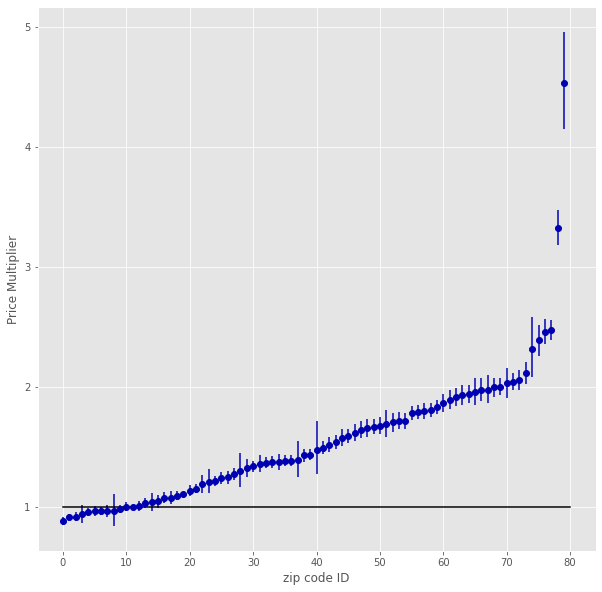

In [568]:
fig, ax = plt.subplots( figsize = (10,10) )

yerrors = np.array([[m-el,eh-m] for m,el,eh in zip(zip_results['multiplier'],\
                                          zip_results['interval_95_low'],\
                                          zip_results['interval_95_high'])])

yerrors

ax.errorbar(x=np.arange(len(zip_results)),y=zip_results['multiplier'],\
            yerr=yerrors.T, fmt='o', color = (0.0,0.0,0.7,1.0))
ax.plot([0,len(zip_results)],[1,1], color = (0.0,0.0,0.0,1.0))
ax.set_ylabel('Price Multiplier')
ax.set_xlabel('zip code ID')

Below, I calculate how large of an effect each parameter has on the predicted price.

In [513]:
sum(zip_results['interval_95_low'] > 2)

7

In [422]:
sum(zip_results['interval_95_high'] < 0.9)

0

### Interpretation of Models

**Version 1**:<br>
**parameters**:<br>
1. const<br>
2. ln_sqft_living<br>

The price of a house should definitely be correlated with the size of the house, so square feet of living space is a good place to start.<br>

**Results**:<br>
Adjusted R-squared: 0.351<br>
F p-value: 0.00<br>
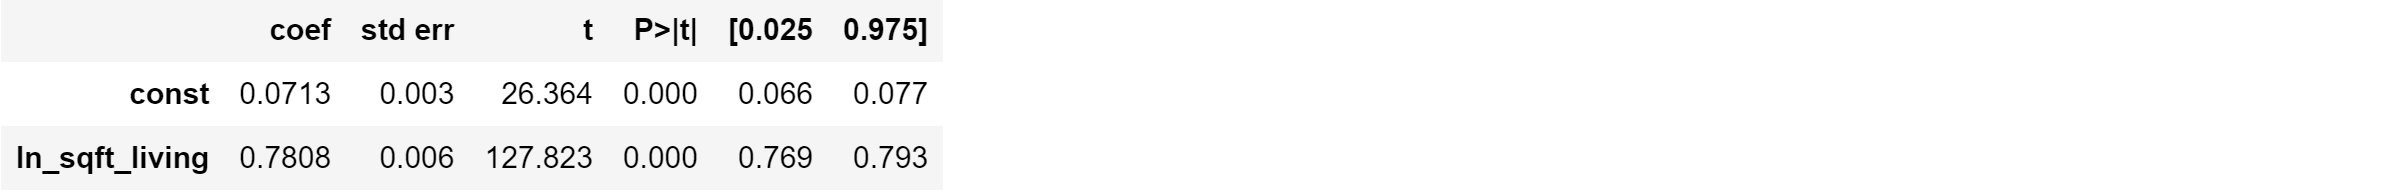

const meaning: Price is $924,568.27 for a home with median square feet of living space (1920 sq-ft)<br>
ln_sqft_meaning: Price 7.7% larger if sqft_living gets 10% larger<br>

**Interpretation**<br>
As expected, there is a statistically signficant trend between price and sqft_living. Growth in the size of the home is predicted to raise the price.<br>
There do appear to be some trends between other features and the residuals of the model, so I can add more independent variables to the model.

**Version 2**:<br>
**parameters**:<br>
1. const<br>
2. ln_sqft_living<br>
3. grade<br>

I added in grade because it looked like there was still a trend with grade when compared to the residuals of model Version 1.<br>

**Results**:<br>
Adjusted R-squared: 0.428<br>
F p-value: 0.00<br>
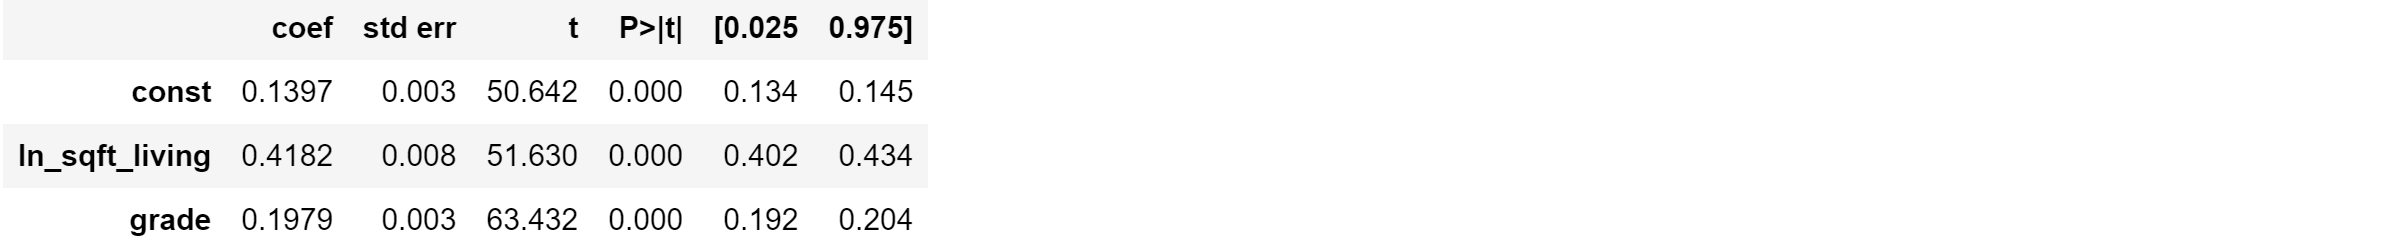

const meaning: Price is $988,950.94 for a home with:<br>
1. median square feet of living space (1920 sq-ft).<br>
2. a grade of 8.<br>

ln_sqft_living meaning: Price 4.1% larger if sqft_living gets 10% larger<br>
grade meaning: Price gets 21.8% larger if grade increases by 1<br>

**Interpretation**<br>
The adjusted R-squared rose to 0.428, meaning the model is accounting for more of the variance in price.<br>
Both sqft_living and grade had statistically significant trends.<br>
This model predicts that price goes up 4.1% when living area goes up by 10%.<br>
According to this model, the grade has a big effect; increasing the grade by 1 raises the price by 21.8%.

**Version 3**:<br>
**parameters**:<br>
1. const<br>
2. ln_sqft_living<br>
3. grade<br>
4. has_waterfront<br>

This time, I introduced a categorical variable that says whether a house is a waterfront property.<br>

**Results**:<br>
Adjusted R-squared: 0.438<br>
F p-value: 0.00<br>
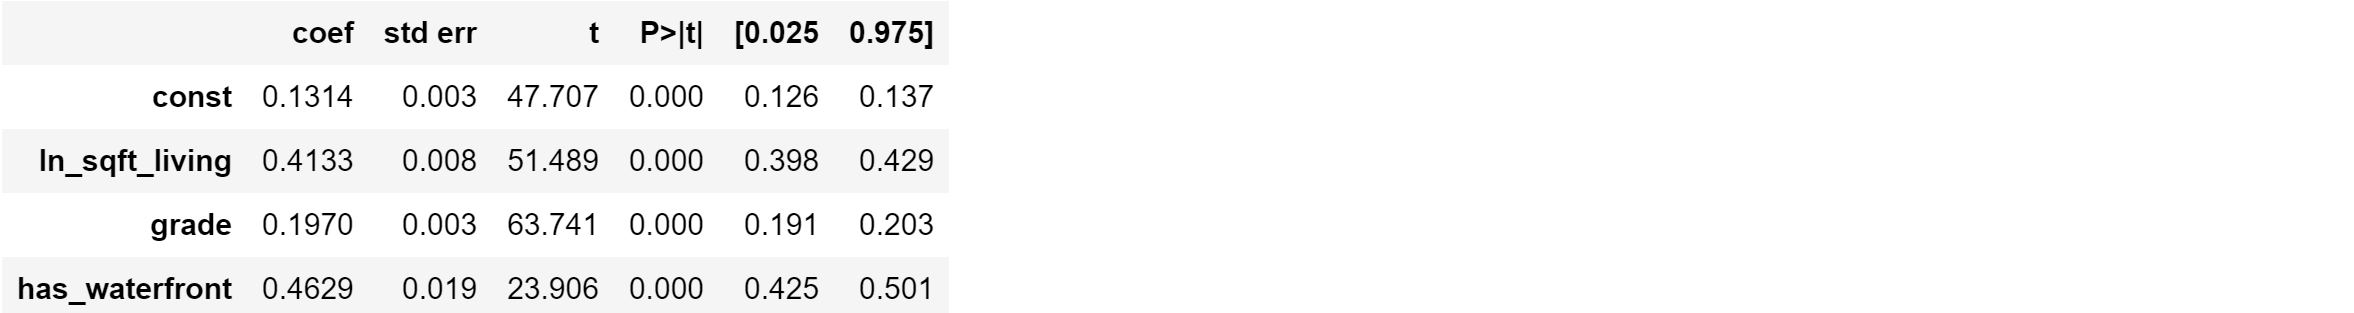

const meaning: Price is $980,776.61 for a home with:<br>
1. median square feet of living space (1920 sq-ft).<br>
2. a grade of 8.<br>
3. not on a waterfront.<br>

ln_sqft_living meaning: Price 4.0% larger if sqft_living gets 10% larger<br>
grade meaning: Price gets 21.8% larger if grade increases by 1<br>
has_waterfront meaning: A home on a waterfront will be worth 58.9% more than one that is not.<br>

**Interpretation**<br>
The adjusted R-squared rose to 0.438, a small increase from the last model.<br>
All the parameters had p-values below 0.05.<br>
The parameters for sqft_living and grade are nearly identical to the last model.<br>
This model says there is a big difference between being on a waterfront and not. Being on a waterfront makes the price 58.9% larger on average.

**Version 4**:<br>
**parameters**:<br>
1 const<br>
2 ln_sqft_living<br>
3 grade<br>
4 has_waterfront<br>
5-82 zip_id_1 - zip_id_78<br>

The previous model had 4 parameters. This one has 82. This is because I introduced zip code as a categorical variable.<br>

**Results**:<br>
Adjusted R-squared: 0.672<br>
F p-value: 0.00<br>
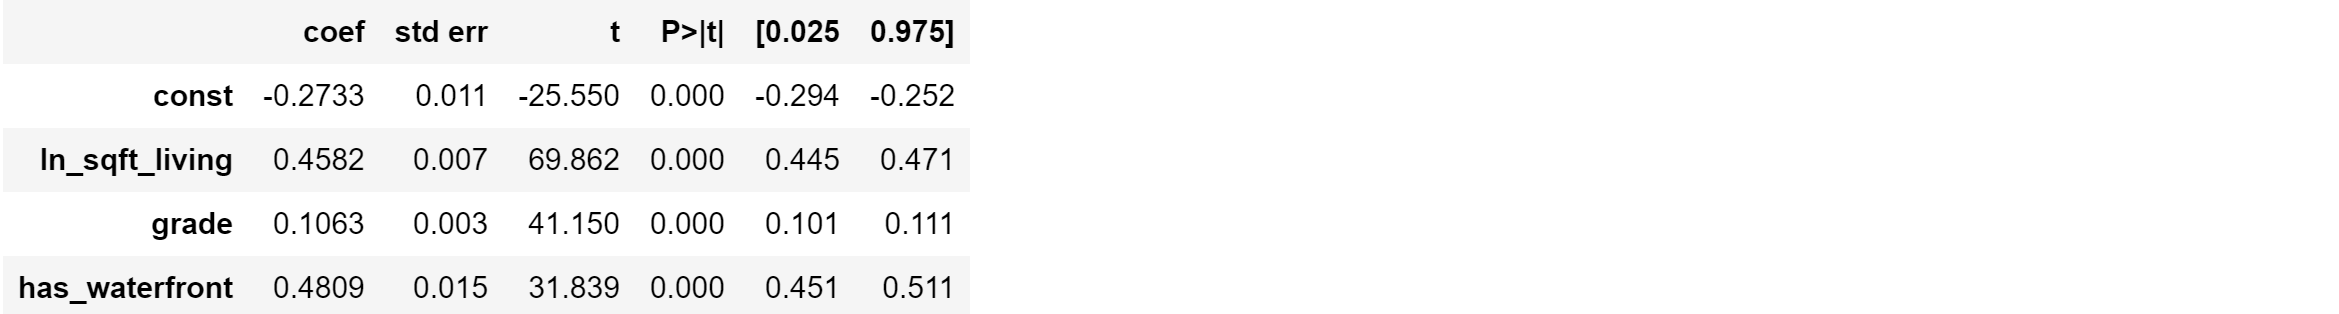
+78 parameters for zip_id

const meaning: Price is $654,351.53 for a home with:<br>
1. median square feet of living space (1920 sq-ft).<br>
2. a grade of 8.<br>
3. not on a waterfront.<br>
4. home in zip code 98042.<br>

ln_sqft_living meaning: Price 4.5% larger if sqft_living gets 10% larger<br>
grade meaning: Price gets 11.2% larger if grade increases by 1<br>
has_waterfront meaning: A home on a waterfront will be worth 61.7% more than one that is not.<br>
zip_id meaning: Taking e to the power of the parameter says how much to multiply the baseline predictions by.<br>

**Interpretation**<br>
The adjusted R-squared rose to 0.672, a sizable increase from the last model.<br>
All the parameters carried over from the last model had p-values below 0.05.<br>
The parameters for sqft_living and has_waterfront only changed slightly.<br>
The parameter for grade changed more drastically. Instead of predicting an increase of 21.8% when the grade increases by 1, it now predicts only an 11.2% increase.<br>
Of the 78 parameters for zip_id, 68 of them had p-values below 0.05. Since there are 78 parameters for zip code, I could also compare to 0.05/78 to reduce the number of false positives. Even when the alpha value is divided by 78, 64 of the zip_id parameters had values below the threshold. This shows that there is a significant trend with zip code.<br>

Many of the parameters are statistically significant, but how big of an actual effect is it? To determine this, I first took e to the power of the parameters. This turns the parameters into a value that you can multiply the baseline predictions by to get a predicted price. Since the baseline model assumes the zip code is 98042, these values essentially describe how much bigger the price of similar houses in other zip codes are. A value of 1.15 means the prices are predicted to be 15% larger.<br>

I also used the estimated error in the parameters to create a 95% confidence interval for these multiplicative factors. For 54 of the zip codes, the entire 95% confidence interval was above 1.1, meaning the houses in these zip codes are predicted to be at least 10% more expensive than the houses in 98042 at a high significance.<br>
35 of the zip codes have 95% confidence intervals entirely above 1.5, meaning these zip codes have houses at least 50% as expensive as those in 98042. Eight of the zip codes are predicted to have houses at least double the price of houses in 98042.

**Version 5**:<br>
**parameters**:<br>

1 const<br>
2 ln_sqft_living<br>
3 grade<br>
4 has_waterfront<br>
5-8 condition parameters (Fair, Good, Poor, Very Good)<br>
9-86 zip_id_1 - zip_id_78<br>

This model is the same as the last, except with 4 more parameters for the condition.<br>

**Results**:<br>
Adjusted R-squared: 0.677<br>
F p-value: 0.00<br>
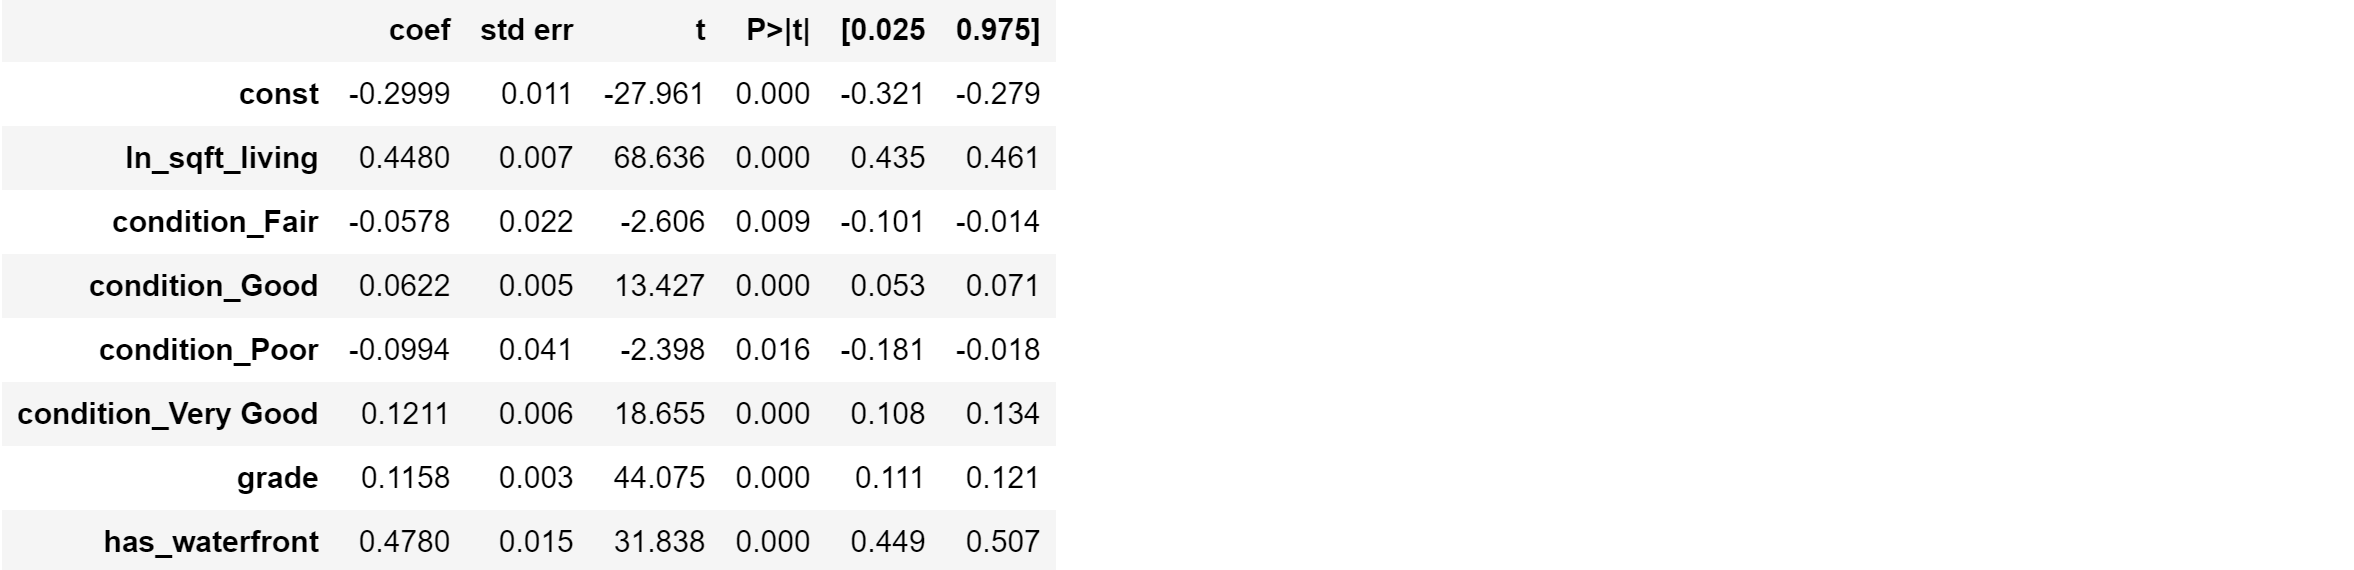
+78 parameters for zip_id

const meaning: Price is $637,175.24 for a home with:<br>
1. median square feet of living space (1920 sq-ft).<br>
2. a grade of 8.<br>
3. not on a waterfront.<br>
4. home in zip code 98042.<br>
5. condition is Average. <br>

ln_sqft_living meaning: Price 4.5% larger if sqft_living gets 10% larger<br>
grade meaning: Price gets 12.3% larger if grade increases by 1<br>
has_waterfront meaning: A home on a waterfront will be worth 61.3% more than one that is not.<br>
zip_id meaning: Taking e to the power of the parameter says how much to multiply the baseline predictions by.<br>
condition meaning: Taking e to the power of the parameter says how much to multiply the baseline predictions by.<br>

**Interpretation**<br>
The adjusted R-squared rose to 0.677, a small increase compared to Version 4.<br>
All the parameters aside from those associated with zip code and condition have p-values below 0.05.<br>
The parameters for sqft_living, has_waterfront, and grade only changed slightly.<br>

The parameters for zip code are nearly identical as the last model. The number of parameters with p-values below 0.05/78 remained the same and the actual values of the parameters did not change substantially.<br>

All four condition parameters were significant at a significance level of 0.05.<br>

The price of a home with a Very Good condition will cost 12.9% more than an Average home (all else being equal).<br>
For Good, Fair, and Poor, those numbers are 6.4% more, 5.6% less, and 9.5% less, respectively.<br>
All of these results make sense. They indicate that as condition goes up (Poor->Fair->Average->Good->Very Good), the price increases.

**Version 6**:<br>
**parameters**:<br>

1 const<br>
2 ln_sqft_living<br>
3 grade<br>
4 has_waterfront<br>
5-8 condition parameters (Fair, Good, Poor, Very Good)<br>
9-86 zip_id_1 - zip_id_78<br>
87 has_yr_renovated<br>
88 yr_renovated<br>

This model is the same as the last, except with a parameter that indicates whether the house was renovated and another to scale with the year it was renovated.<br>

**Results**:<br>
Adjusted R-squared: 0.678<br>
F p-value: 0.00<br>
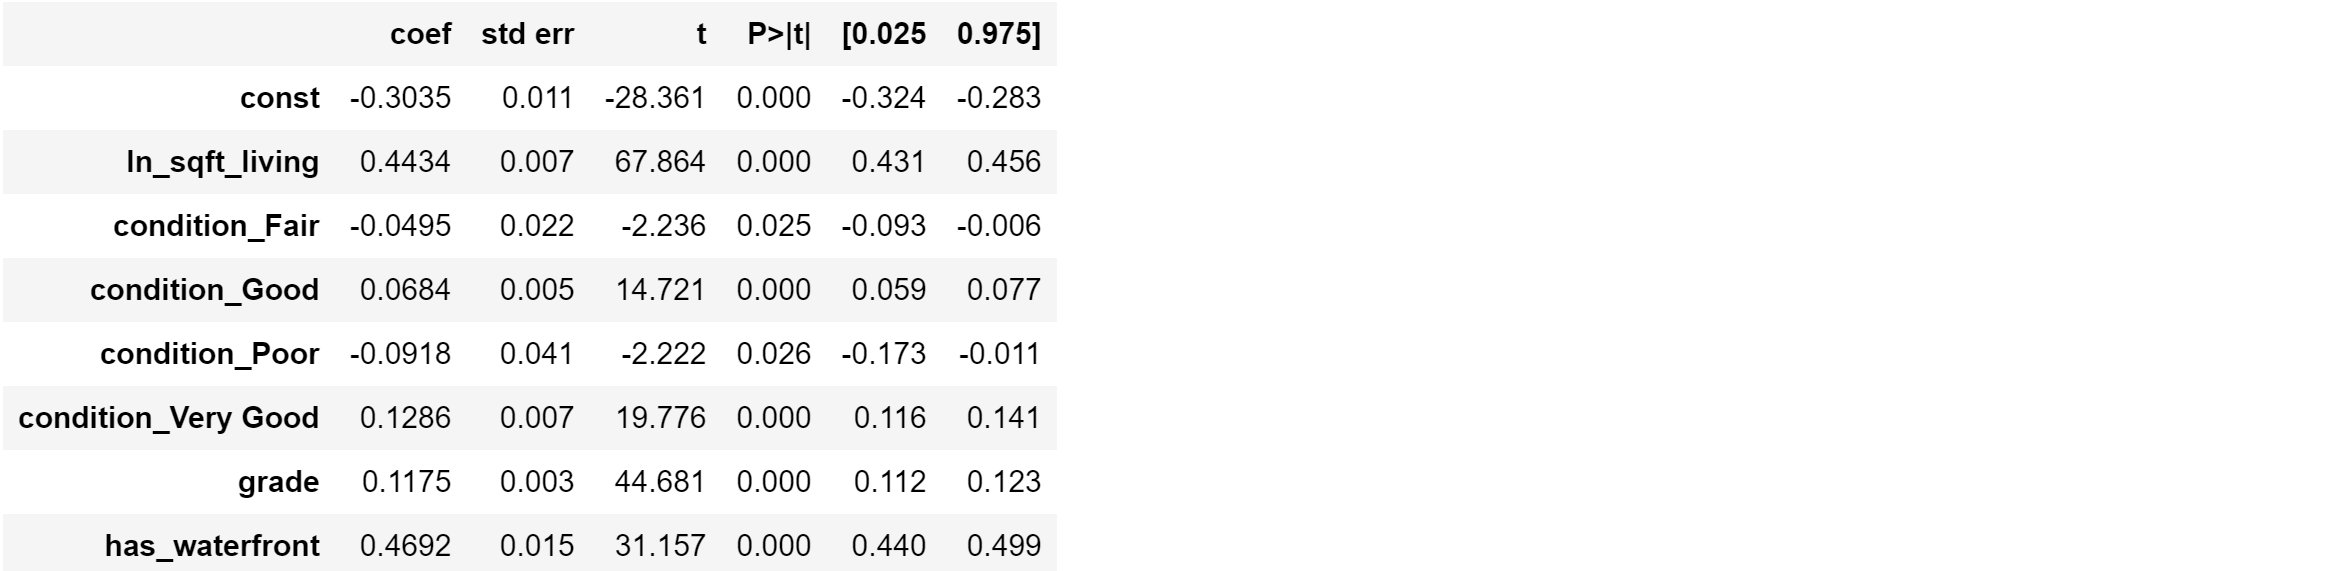
+78 parameters for zip_id
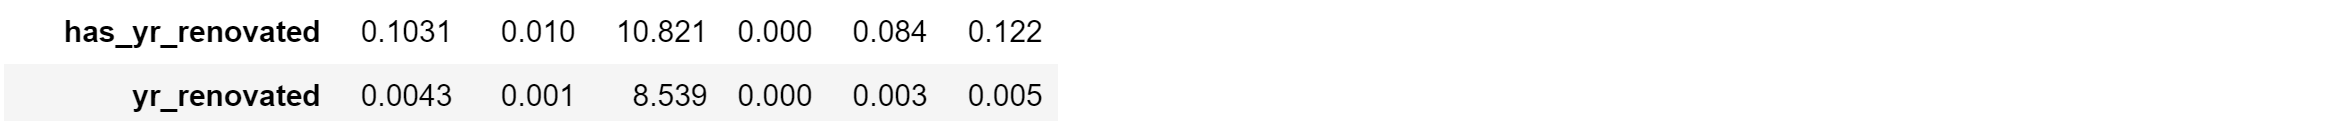

const meaning: Price is $634,885.53 for a home with:<br>
1. median square feet of living space (1920 sq-ft).<br>
2. a grade of 8.<br>
3. not on a waterfront.<br>
4. home in zip code 98042.<br>
5. condition is Average.<br>
6. Not renovated.<br>

ln_sqft_living meaning: Price 4.4% larger if sqft_living gets 10% larger<br>
grade meaning: Price gets 12.5% larger if grade increases by 1<br>
has_waterfront meaning: A home on a waterfront will be worth 59.9% more than one that is not.<br>
zip_id meaning: Taking e to the power of the parameter says how much to multiply the baseline predictions by.<br>
condition meaning: Taking e to the power of the parameter says how much to multiply the baseline predictions by.<br>
has_yr_renovated meaning: Price gets 10.9% larger if the house has been renovated.<br>
yr_renovated meaning: The more recent a renovation, the more it raises the price. The price is multiplied by 1.0043^(year-2002). The 2002 in the model is because yr_renovated had its median subtracted before doing the fit. It might seem like houses renovated prior to 2002 actually lower the price since 1.0043 to a negative power would be less than 0. However, the renovation still achieves the 10.9% increase because a renovation was done. <br>

**Interpretation**<br>
The adjusted R-squared rose to 0.678, barely a change from the previous model.<br>
All the parameters aside from those associated with zip code and condition have p-values below 0.05.<br>
The parameters for sqft_living, has_waterfront, and grade only changed slightly from Version 5.<br>

The parameters for zip code were not affected by the addition of new parameters. The number of parameters with p-values below 0.05/78 remained the same and the actual values of the parameters did not change substantially.<br>

All four condition parameters were significant at a significance level of 0.05.<br>

The actual parameter values for condition did change slightly:
The price of a home with a Very Good condition will cost 13.7% more than an Average home (all else being equal).<br>
For Good, Fair, and Poor, those numbers are 7.1% more, 4.8% less, and 8.8% less, respectively.<br>

The has_year_renovated parameter indicates that performing renovations tends to raise the price of a house by about 11%. The timing of the renovations also matters because more recent renovations tend to raise the price more. The difference is 0.43% per year.

**Version 7**:<br>
**parameters**:<br>

1 const<br>
2 ln_sqft_living<br>
3 grade<br>
4 has_waterfront<br>
5-8 condition parameters (Fair, Good, Poor, Very Good)<br>
9-86 zip_id_1 - zip_id_78<br>
87 has_yr_renovated<br>

This model is the same as the last, except with the yr_renovated parameter removed.<br>

**Results**:<br>
Adjusted R-squared: 0.678<br>
F p-value: 0.00<br>
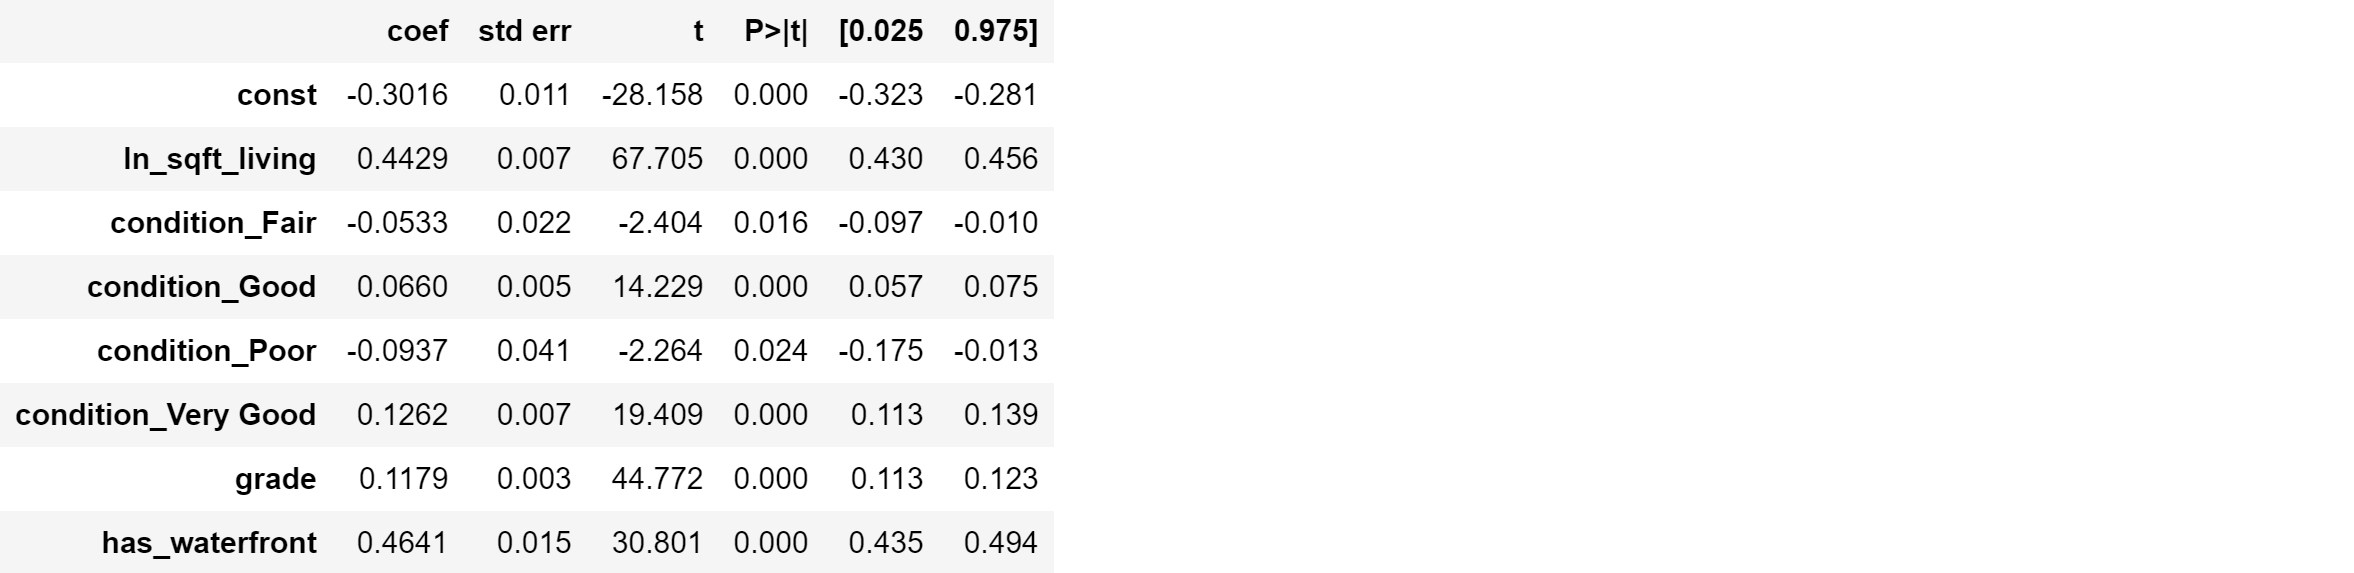
+78 parameters for zip_id
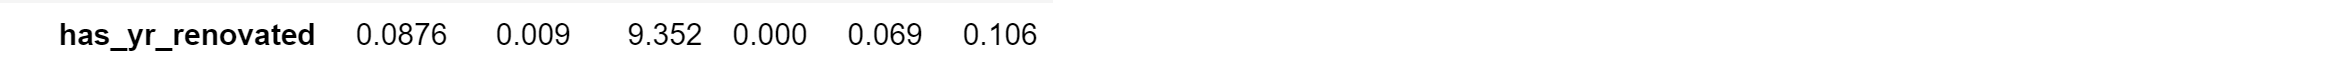

const meaning: Price is $636,092.96 for a home with:<br>
1. median square feet of living space (1920 sq-ft).<br>
2. a grade of 8.<br>
3. not on a waterfront.<br>
4. home in zip code 98042.<br>
5. condition is Average.<br>
6. Not renovated.<br>

ln_sqft_living meaning: Price 4.4% larger if sqft_living gets 10% larger<br>
grade meaning: Price gets 12.5% larger if grade increases by 1<br>
has_waterfront meaning: A home on a waterfront will be worth 59.1% more than one that is not.<br>
zip_id meaning: Taking e to the power of the parameter says how much to multiply the baseline predictions by.<br>
condition meaning: Taking e to the power of the parameter says how much to multiply the baseline predictions by.<br>
has_yr_renovated meaning: Price gets 9.2% larger if the house has been renovated.<br>

**Interpretation**<br>
The adjusted R-squared rose to 0.678, the same as the previous model.<br>
All the parameters aside from those associated with zip code and condition have p-values below 0.05.<br>
The parameters for sqft_living, has_waterfront, and grade only changed slightly from Version 6.<br>

The parameters for zip code were not affected by the addition of new parameters. The number of parameters with p-values below 0.05/78 remained the same and the actual values of the parameters did not change substantially.<br>

All four condition parameters were significant at a significance level of 0.05.<br>

The actual parameter values for condition did change slightly:
The price of a home with a Very Good condition will cost 13.5% more than an Average home (all else being equal).<br>
For Good, Fair, and Poor, those numbers are 6.8% more, 5.2% less, and 9.8% less, respectively.<br>

The has_yr_renovated parameter indicates that performing renovations tends to raise the price of a house by about 9%.<br>
I removed the yr_renovated parameter because it made predictions that don't make sense for houses renovated a long time ago. One would expect that more recent renovations would raise the price more and the yr_renovated parameter did achieve that. However, if you go back far enough in time, the model would predict that making renovations would actually decrease the value of a house. This does not make much sense, so the parameter was removed.

In [578]:
# Calculate baseline price
np.exp(-0.3016+13.6647)

636092.9630765109

In [186]:
# Calculate median sqft_living
np.exp(7.5601)

1920.0375075244453

In [579]:
1.1**results.params['ln_sqft_living']

1.0431143428986536

In [580]:
np.exp(results.params['grade'])

1.1251100615765017

In [581]:
np.exp(results.params['has_waterfront'])

1.5905336351477488

In [582]:
np.exp(results.params['has_yr_renovated'])

1.091509450438899

In [564]:
np.exp(results.params['yr_renovated'])

1.004289648119155

In [389]:
np.exp(results.params['zip_id_56'])

1.7153761354457802

In [565]:
sum(results.pvalues[8:] < 0.05/78)

67

## All the fits

In [650]:
# List of features with type of feature

features = [['log_sqft_living','numerical'], \
            ['log_sqft_lot','numerical'], \
            ['log_sqft_basement','num-cat'], \
            ['log_sqft_garage','num-cat'], \
            ['log_sqft_patio','num-cat'], \
            ['bedrooms','numerical'], \
            ['bathrooms','numerical'], \
            ['floors','numerical'], \
            ['yr_built','numerical'], \
            ['condition','categorical'], \
            ['grade','numerical'], \
            ['waterfront','YN'], \
            ['greenbelt','YN'], \
            ['nuisance','YN'], \
            ['view','categorical']]

# y-values for linear regression model
y = df_adj['log_price']

n_features = len(features)

# Arrays for storing results
Rsquared_adj = np.zeros(2**n_features-1)
F_pval = np.zeros(2**n_features-1)
p_below_alpha = np.zeros(2**n_features-1)
n_params = np.zeros(2**n_features-1)
feats_in_fit = np.zeros((2**n_features-1,n_features))

# Loop over every possible combinations of features
n = 1
while n < 2**n_features:
    in_fit = df_adj[['log_price']]
    n_bin = np.binary_repr(n,width=len(features))
    count = 0
    
    # Build the X DataFrame for the linear regression model
    for i,feat in enumerate(features):
        if n_bin[i] == '1':
            count += 1
            
            if feat[1] == 'numerical': in_fit[feat[0]] = df_adj[feat[0]]
                
            if feat[1] == 'num-cat':
                in_fit['has_'+feat[0]] = df_adj[feat[0]].apply(lambda x: 0 if x == -10 else 1)
                in_fit[feat[0]] = df_adj[feat[0]] * in_fit['has_'+feat[0]]
                
            if feat[1] == 'categorical':
                in_fit[feat[0]] = df_adj[feat[0]]
                in_fit = pd.get_dummies(in_fit, columns=[feat[0]], drop_first=True)
                
            if feat[1] == 'YN': in_fit['has_'+feat[0]] = df_adj[feat[0]].apply(lambda x: 1 if x == 'YES' else 0)

    # Linear regression model
    X = in_fit.drop(columns = 'log_price')
    results = sm.OLS(y,sm.add_constant(X)).fit()
    
    # Store results
    Rsquared_adj[n-1] = results.rsquared_adj
    F_pval[n-1] = results.f_pvalue
    p_below_alpha[n-1] = sum(results.pvalues[1:] < 0.05)
    n_params[n-1] = len(results.pvalues[1:])
    feats_in_fit[n-1] = np.array([int(np.binary_repr(n,width=len(features))[i]) for i, feat in enumerate(features)])
    
    print(n, results.rsquared_adj, results.f_pvalue, sum(results.pvalues[1:] < 0.05),len(results.pvalues[1:]))
    n += 1

In [665]:
df_fits = pd.DataFrame(data = feats_in_fit, columns = [x[0] for x in features])
df_fits['F_pvalue'] = F_pval
df_fits['Rsquared_adj'] = Rsquared_adj
df_fits['p_below_alpha'] = p_below_alpha
df_fits['n_params'] = n_params
df_fits['reject_prop'] = p_below_alpha / n_params
df_fits

In [711]:
df_fits[df_fits['reject_prop'] == 1.0].sort_values(by = 'Rsquared_adj', ascending = False).head(30)

In [712]:
# Create a specific model

features = [['log_sqft_living','numerical'], \
            ['log_sqft_lot','numerical'], \
            ['log_sqft_basement','num-cat'], \
            ['log_sqft_garage','num-cat'], \
            ['log_sqft_patio','num-cat'], \
            ['bedrooms','numerical'], \
            ['bathrooms','numerical'], \
            ['floors','numerical'], \
            ['yr_built','numerical'], \
            ['condition','categorical'], \
            ['grade','numerical'], \
            ['waterfront','YN'], \
            ['greenbelt','YN'], \
            ['nuisance','YN'], \
            ['view','categorical'], \
            ['zip','categorical']]

y = df_adj['log_price']

#n = 28638
n = 18268

print(n)
in_fit = df_adj[['log_price']]
n_bin = np.binary_repr(n,width=len(features))
for i,feat in enumerate(features):
    if n_bin[i] == '1':
            
        if feat[1] == 'numerical': in_fit[feat[0]] = df_adj[feat[0]]
                
        if feat[1] == 'num-cat':
            in_fit['has_'+feat[0]] = df_adj[feat[0]].apply(lambda x: 0 if x == -10 else 1)
            in_fit[feat[0]] = df_adj[feat[0]] * in_fit['has_'+feat[0]]
                
        if feat[1] == 'categorical':
            in_fit[feat[0]] = df_adj[feat[0]]
            in_fit = pd.get_dummies(in_fit, columns=[feat[0]], drop_first=True)
                
        if feat[1] == 'YN': in_fit['has_'+feat[0]] = df_adj[feat[0]].apply(lambda x: 1 if x == 'YES' else 0)

            
in_fit['yr_built'] = df_adj['yr_built'] - 1960
#in_fit['log_sqft_livingxgrade'] = df_adj['log_sqft_living'] * df_adj['grade']
X = in_fit.drop(columns = 'log_price')
results = sm.OLS(y,sm.add_constant(X)).fit()
results.summary()